# Decision Tree

# Problem Statement

Given the dataset with information about individuals, their demographics, and financial behavior, the task is to predict
whether a customer will respond positively to a discount offering. This is a binary classification problem where the goal
is to build a predictive model that can classify customers into two categories: those likely to accept a discount offering
and those not likely to accept.

# **Data Dictionary:**

1. **REF_NO:** Unique identifier for each record.
2. **children:** Number of children, categorized.
3. **age_band:** Age group of the individual.
4. **status:** Marital status of the individual.
5. **occupation:** Occupation of the individual.
6. **occupation_partner:** Occupation of the partner.
7. **home_status:** Home ownership status.
8. **self_employed:** Indicates if the individual is self-employed.
9. **self_employed_partner:** Indicates if the partner is self-employed.
10. **year_last_moved:** The year the individual last moved.
11. **TVarea:** Television viewing area.
12. **post_code:** Postal code of the individual.
13. **post_area:** Postal area of the individual.
14. **Average Credit Card Transaction:** Financial information - average credit card transactions.
15. **Balance Transfer:** Financial information - balance transfer.
16. **Term Deposit:** Financial information - term deposit.
17. **Life Insurance:** Financial information - life insurance.
18. **Medical Insurance:** Financial information - medical insurance.
19. **Average A/C Balance:** Financial information - average account balance.
20. **Personal Loan:** Financial information - personal loan.
21. **Investment in Mutual Fund:** Financial information - investment in mutual funds.
22. **Investment Tax Saving Bond:** Financial information - investment in tax-saving bonds.
23. **Home Loan:** Financial information - home loan.
24. **Online Purchase Amount:** Financial information - amount spent on online purchases.
25. **Discount Offering:** The target variable indicating the level of discount offered (categorized).
26. **gender:** Gender of the individual.
27. **region:** Region of residence.
28. **Investment in Commodity:** Financial information - investment in commodities.
29. **Investment in Equity:** Financial information - investment in equity.
30. **Investment in Derivative:** Financial information - investment in derivatives.
31. **Portfolio Balance:** Financial information - portfolio balance.


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the input data file
df = pd.read_csv("/content/drive/MyDrive/Discount Offering.csv")

In [ ]:
#Checking the numbers of rows and columns
df.head()

REF_NO children age_band                status        occupation  \
0       1     Zero    51-55               Partner     Manual Worker   
1       2     Zero    55-60  Single/Never Married           Retired   
2       3     Zero    26-30  Single/Never Married      Professional   
3       5     Zero    18-21  Single/Never Married      Professional   
4       6     Zero    45-50               Partner  Business Manager   

  occupation_partner home_status self_employed self_employed_partner  \
0  Secretarial/Admin    Own Home            No                    No   
1            Retired    Own Home            No                    No   
2              Other    Own Home           Yes                    No   
3      Manual Worker    Own Home            No                    No   
4            Unknown    Own Home            No                    No   

   year_last_moved  ... Investment Tax Saving Bond Home Loan  \
0             1972  ...                      19.99      0.00   
1             1998  ...                       0.00      0.00   
2             1996  ...                       0.00      3.49   
3             1997  ...                       0.00      0.00   
4             1995  ...                       0.00     45.91   

  Online Purchase Amount  Discount Offering  gender         region  \
0                   0.00                  1  Female          Wales   
1                   0.00                  2  Female     North West   
2                   0.00                  2    Male          North   
3                   0.00                  2  Female  West Midlands   
4                  25.98                  2  Female       Scotland   

   Investment in Commudity  Investment in Equity  Investment in Derivative  \
0                    74.67                 18.66                     32.32   
1                    20.19                  0.00                      4.33   
2                    98.06                 31.07                     80.96   
3                     4.10                 14.15                     17.57   
4                    70.16                 55.86                     80.44   

   Portfolio Balance  
0              89.43  
1              22.78  
2             171.78  
3             -41.70  
4             235.02  

[5 rows x 31 columns]

In [ ]:
df.tail()

REF_NO children age_band   status         occupation  \
10150   11512        1    45-50  Partner  Secretarial/Admin   
10151   11513     Zero    45-50  Partner      Manual Worker   
10152   11514        2    41-45  Partner          Housewife   
10153   11516     Zero    51-55  Partner              Other   
10154   11518        1    31-35  Partner            Unknown   

      occupation_partner           home_status self_employed  \
10150      Manual Worker              Own Home            No   
10151      Manual Worker  Rent from Council/HA            No   
10152       Professional              Own Home            No   
10153      Manual Worker              Own Home            No   
10154          Housewife              Own Home            No   

      self_employed_partner  year_last_moved  ... Investment Tax Saving Bond  \
10150                    No             1972  ...                       4.49   
10151                    No             1988  ...                       0.00   
10152                    No             1992  ...                       0.00   
10153                   Yes             1970  ...                       0.00   
10154                    No             1996  ...                      19.49   

      Home Loan Online Purchase Amount  Discount Offering  gender      region  \
10150      0.00                    0.0                  2  Female  South East   
10151      0.00                    0.0                  2  Female  South East   
10152      0.00                    0.0                  2  Female  South East   
10153      7.98                    0.0                  2  Female  South East   
10154      0.00                    0.0                  2  Female       Wales   

       Investment in Commudity  Investment in Equity  \
10150                     7.29                  3.50   
10151                    62.27                  3.00   
10152                    52.77                  0.00   
10153                     7.20                  2.99   
10154                    72.14                 45.98   

       Investment in Derivative  Portfolio Balance  
10150                      9.57              10.23  
10151                     36.40             102.62  
10152                     14.07              76.18  
10153                      1.66               4.79  
10154                     99.35             227.12  

[5 rows x 31 columns]

In [ ]:
#checking the shape of data
df.shape

(10155, 31)

In [ ]:
# Checking the column names
df.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average Credit Card Transaction', 'Balance Transfer',
       'Term Deposit', 'Life Insurance', 'Medical Insurance',
       'Average A/C Balance', 'Personal Loan', 'Investment in Mutual Fund',
       'Investment Tax Saving Bond', 'Home Loan', 'Online Purchase Amount',
       'Discount Offering', 'gender', 'region', 'Investment in Commudity',
       'Investment in Equity', 'Investment in Derivative',
       'Portfolio Balance'],
      dtype='object')

# Checking column type and missing values

In [ ]:
#getting all the information of dataset using info command
#info command gives
  #1 No of rows
  #2 No of columns
  #3 No of float,int,object columns
  #4 Datatype of all the columns
  #5 Notnull values of all the columns
  #6 Memory used for storing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           10155 non-null  int64  
 1   children                         10155 non-null  object 
 2   age_band                         10155 non-null  object 
 3   status                           10155 non-null  object 
 4   occupation                       10155 non-null  object 
 5   occupation_partner               10155 non-null  object 
 6   home_status                      10155 non-null  object 
 7   self_employed                    10155 non-null  object 
 8   self_employed_partner            10155 non-null  object 
 9   year_last_moved                  10155 non-null  int64  
 10  TVarea                           10155 non-null  object 
 11  post_code                        10155 non-null  object 
 12  post_area         

In [ ]:
# Observations

# There are 10155 rows and 31 columns.
# There are 13 independent object variable,  17 numerical independent variable and dependent variable is of int64 type.

# Column name has some spaces fix them

In [ ]:
df.columns = [col.replace(' ','_') for col in df.columns]

# Checking the null values

In [ ]:
df.isna().sum()

REF_NO                             0
children                           0
age_band                           0
status                             0
occupation                         0
occupation_partner                 0
home_status                        0
self_employed                      0
self_employed_partner              0
year_last_moved                    0
TVarea                             0
post_code                          0
post_area                          0
Average_Credit_Card_Transaction    0
Balance_Transfer                   0
Term_Deposit                       0
Life_Insurance                     0
Medical_Insurance                  0
Average_A/C_Balance                0
Personal_Loan                      0
Investment_in_Mutual_Fund          0
Investment_Tax_Saving_Bond         0
Home_Loan                          0
Online_Purchase_Amount             0
Discount_Offering                  0
gender                             0
region                             0
I

# Statistical Summary

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
df.describe(include='all').T

count unique           top  freq     mean  \
REF_NO                          10155.000    NaN           NaN   NaN 5770.831   
children                            10155      5          Zero  6208      NaN   
age_band                            10155     13         45-50  1359      NaN   
status                              10155      5       Partner  7709      NaN   
occupation                          10155      9  Professional  2449      NaN   
occupation_partner                  10155      9       Unknown  2394      NaN   
home_status                         10155      5      Own Home  9413      NaN   
self_employed                       10155      2            No  9436      NaN   
self_employed_partner               10155      2            No  9026      NaN   
year_last_moved                 10155.000    NaN           NaN   NaN 1968.376   
TVarea                              10155     14       Central  1618      NaN   
post_code                           10155  10040      SA15 3HP     2      NaN   
post_area                           10155   2039           PR5    35      NaN   
Average_Credit_Card_Transaction 10155.000    NaN           NaN   NaN   23.442   
Balance_Transfer                10155.000    NaN           NaN   NaN   46.418   
Term_Deposit                    10155.000    NaN           NaN   NaN   27.580   
Life_Insurance                  10155.000    NaN           NaN   NaN   66.242   
Medical_Insurance               10155.000    NaN           NaN   NaN   19.142   
Average_A/C_Balance             10155.000    NaN           NaN   NaN   32.085   
Personal_Loan                   10155.000    NaN           NaN   NaN   26.006   
Investment_in_Mutual_Fund       10155.000    NaN           NaN   NaN   42.340   
Investment_Tax_Saving_Bond      10155.000    NaN           NaN   NaN    6.112   
Home_Loan                       10155.000    NaN           NaN   NaN    4.482   
Online_Purchase_Amount          10155.000    NaN           NaN   NaN   19.163   
Discount_Offering               10155.000    NaN           NaN   NaN    1.893   
gender                              10155      3        Female  7634      NaN   
region                              10155     13    South East  2100      NaN   
Investment_in_Commudity         10155.000    NaN           NaN   NaN   36.565   
Investment_in_Equity            10155.000    NaN           NaN   NaN   21.699   
Investment_in_Derivative        10155.000    NaN           NaN   NaN   31.989   
Portfolio_Balance               10155.000    NaN           NaN   NaN   90.460   

                                     std     min      25%      50%      75%  \
REF_NO                          3324.838   1.000 2903.500 5770.000 8665.500   
children                             NaN     NaN      NaN      NaN      NaN   
age_band                             NaN     NaN      NaN      NaN      NaN   
status                               NaN     NaN      NaN      NaN      NaN   
occupation                           NaN     NaN      NaN      NaN      NaN   
occupation_partner                   NaN     NaN      NaN      NaN      NaN   
home_status                          NaN     NaN      NaN      NaN      NaN   
self_employed                        NaN     NaN      NaN      NaN      NaN   
self_employed_partner                NaN     NaN      NaN      NaN      NaN   
year_last_moved                  180.202   0.000 1978.000 1988.000 1994.000   
TVarea                               NaN     NaN      NaN      NaN      NaN   
post_code                            NaN     NaN      NaN      NaN      NaN   
post_area                            NaN     NaN      NaN      NaN      NaN   
Average_Credit_Card_Transaction   50.872   0.000    0.000    0.000   23.980   
Balance_Transfer                  78.478   0.000    0.000   17.960   65.385   
Term_Deposit                      53.953   0.000    0.000    0.000   34.990   
Life_Insurance                    95.545   0.000    0.000   31.980   94.390   
Medical_Insurance    

In [ ]:
# # insights from the above observations
# Financial Balances:
# Customers have various financial balances, such as "Average_Credit_Card_Transaction," "Balance_Transfer," "Term_Deposit," "Life_Insurance," "Medical_Insurance," "Average_A/C_Balance," "Personal_Loan," and others.

# Customer Demographics:
# The dataset contains information about 10,155 customers.
# The average age band is 45-50, with a total of 13 age bands.
# The majority of customers are in the "Partner" status and are not self-employed.

# Online Activity:
# Information about the "Online_Purchase_Amount" suggests that customers engage in online purchases.
# "Discount_Offering" may be related to online purchases, with a value of 1 or 2 indicating different discount levels.

# Lets explore dependent variable

In [ ]:
# We do not require REF_NO column so we can drop it
df=df.drop("REF_NO",axis=1)

In [ ]:
df.children = [str.replace('Zero','0') for str in df.children]
df.children = [str.replace('4+','4') for str in df.children]

In [ ]:
df.children.unique()

array(['0', '1', '2', '3', '4'], dtype=object)

In [ ]:
df.shape

(10155, 30)

In [ ]:
#Checking for the unique values of age_band column before cleaning
print(df['age_band'].unique())

#Correcting the data for feature engineering later
df["age_band"] =df["age_band"].replace({"Unknown": "00-00"})
df["age_band"] =df["age_band"].replace({"71+":"71-71"})

#Extracting the lower limit and the higher limit
df['lower_age'] = pd.to_numeric(df.age_band.str[:2])

df['upper_age'] = pd.to_numeric(df.age_band.str[3:5])

#Creating column with the average age
df["age_band"] = (df["lower_age"] + df["upper_age"])*0.5

#Since cannot be an age band, imputing it with median values
df["age_band"] = df["age_band"].replace(0, df["age_band"].median())

# Dropping the intermediary columns
df.drop(["lower_age", "upper_age"], axis=1, inplace=True)
print(df['age_band'].unique())


['51-55' '55-60' '26-30' '18-21' '45-50' '36-40' '61-65' '31-35' '41-45'
 '71+' '22-25' '65-70' 'Unknown']
[53.  57.5 28.  19.5 47.5 38.  63.  33.  43.  71.  23.5 67.5]


In [ ]:
df['age_band'].value_counts()

47.500    1414
38.000    1134
43.000    1112
33.000    1061
53.000    1052
57.500    1047
28.000     927
63.000     881
67.500     598
23.500     456
71.000     410
19.500      63
Name: age_band, dtype: int64

In [ ]:
# lets analyse post area and post code columns.

In [ ]:
df.post_code.nunique()

10040

In [ ]:
df.post_area.nunique()

2039

In [ ]:
# Here post_code already has features of post_area, so we drop post_code column.

In [ ]:
df.drop('post_code',axis=1,inplace=True)

In [ ]:
#  now lets analyse post area.

In [ ]:
# we have mostly 2 alphabets in post area.

In [ ]:
df.post_area.str[0:2].value_counts()

WA    249
PR    239
NG    209
SA    205
CF    199
     ... 
GY      1
EC      1
WC      1
HS      1
L0      1
Name: post_area, Length: 157, dtype: int64

In [ ]:
df.post_area=df.post_area.str[0:2]
df.post_area.unique()

array(['NP', 'M4', 'NE', 'HR', 'KA', 'IP', 'CV', 'G6', 'E1', 'WA', 'LL',
       'SA', 'L7', 'GL', 'B7', 'ML', 'WV', 'TA', 'NN', 'M3', 'EH', 'WF',
       'TN', 'LE', 'AB', 'LS', 'SP', 'EX', 'LN', 'CF', 'DE', 'CB', 'L3',
       'BT', 'FK', 'OL', 'PR', 'MK', 'BH', 'RG', 'BB', 'AL', 'KY', 'RH',
       'EN', 'NG', 'TQ', 'DH', 'L1', 'PO', 'IV', 'B9', 'SO', 'ST', 'YO',
       'OX', 'RM', 'CH', 'PE', 'CM', 'HP', 'B6', 'NR', 'PA', 'CR', 'TR',
       'M2', 'L2', 'DD', 'SN', 'DL', 'CT', 'TS', 'DN', 'DY', 'SM', 'WN',
       'CO', 'S6', 'CA', 'S7', 'NW', 'HU', 'HX', 'DT', 'CW', 'SK', 'GU',
       'TW', 'B4', 'SL', 'ME', 'BN', 'WS', 'BA', 'BL', 'LA', 'SS', 'BS',
       'BD', 'HA', 'L4', 'HD', 'G7', 'PL', 'M1', 'SE', 'SW', 'N1', 'WD',
       'M5', 'KT', 'S3', 'TF', 'SY', 'TD', 'M6', 'S4', 'IG', 'HG', 'SR',
       'FY', 'DA', 'IM', 'LU', 'S2', 'S1', 'M7', 'WR', 'L9', 'UB', 'N2',
       'M8', 'ZE', 'B3', 'KW', 'S8', 'G3', 'G8', 'B2', 'L5', 'DG', 'G4',
       'L8', 'L6', 'PH', 'W1', 'JE', 'LD', 'M9', 'G

In [ ]:
# there are some about 50 amount of rows in each category in post area

In [ ]:
df.groupby('post_area').filter(lambda x : len(x)<50).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1588 entries, 3 to 10150
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   children                         1588 non-null   object 
 1   age_band                         1588 non-null   float64
 2   status                           1588 non-null   object 
 3   occupation                       1588 non-null   object 
 4   occupation_partner               1588 non-null   object 
 5   home_status                      1588 non-null   object 
 6   self_employed                    1588 non-null   object 
 7   self_employed_partner            1588 non-null   object 
 8   year_last_moved                  1588 non-null   int64  
 9   TVarea                           1588 non-null   object 
 10  post_area                        1588 non-null   object 
 11  Average_Credit_Card_Transaction  1588 non-null   float64
 12  Balance_Transfer   

In [ ]:
# 1588 rows in each category is there which means 15% of data  so we cannot delete the rows hence we dropping the column.

In [ ]:
df.drop('post_area',axis=1,inplace=True)

In [ ]:
df.head()

children  age_band                status        occupation  \
0        0    53.000               Partner     Manual Worker   
1        0    57.500  Single/Never Married           Retired   
2        0    28.000  Single/Never Married      Professional   
3        0    19.500  Single/Never Married      Professional   
4        0    47.500               Partner  Business Manager   

  occupation_partner home_status self_employed self_employed_partner  \
0  Secretarial/Admin    Own Home            No                    No   
1            Retired    Own Home            No                    No   
2              Other    Own Home           Yes                    No   
3      Manual Worker    Own Home            No                    No   
4            Unknown    Own Home            No                    No   

   year_last_moved       TVarea  ...  Investment_Tax_Saving_Bond  Home_Loan  \
0             1972          HTV  ...                      19.990      0.000   
1             1998      Granada  ...                       0.000      0.000   
2             1996    Tyne Tees  ...                       0.000      3.490   
3             1997      Central  ...                       0.000      0.000   
4             1995  Scottish TV  ...                       0.000     45.910   

   Online_Purchase_Amount  Discount_Offering  gender         region  \
0                   0.000                  1  Female          Wales   
1                   0.000                  2  Female     North West   
2                   0.000                  2    Male          North   
3                   0.000                  2  Female  West Midlands   
4                  25.980                  2  Female       Scotland   

   Investment_in_Commudity  Investment_in_Equity  Investment_in_Derivative  \
0                   74.670                18.660                    32.320   
1                   20.190                 0.000                     4.330   
2                   98.060                31.070                    80.960   
3                    4.100                14.150                    17.570   
4                   70.160                55.860                    80.440   

   Portfolio_Balance  
0             89.430  
1             22.780  
2            171.780  
3            -41.700  
4            235.020  

[5 rows x 28 columns]

In [ ]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(8,8), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

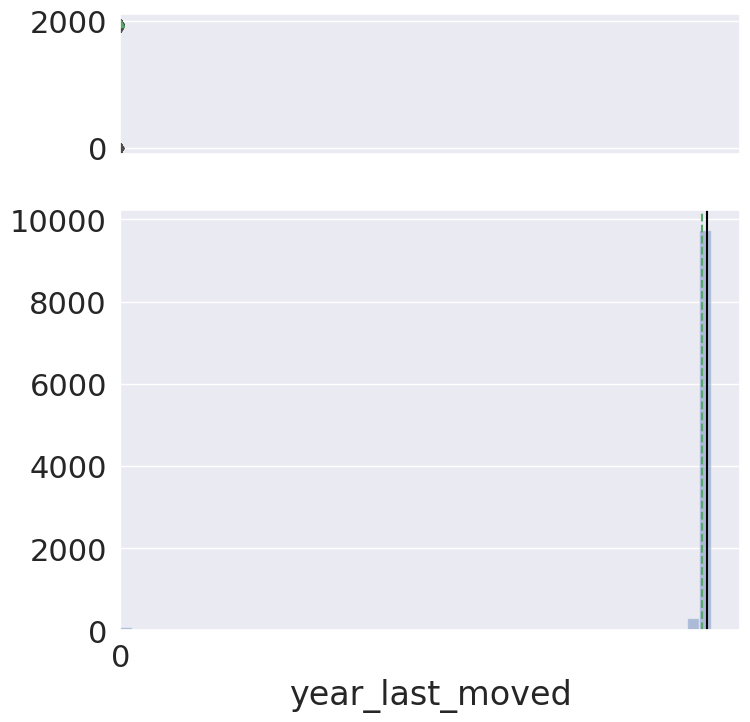

In [ ]:
histogram_boxplot(df.year_last_moved)

In [ ]:
# here many values are 0 which is wrong. so we will replace with median

In [ ]:
df['year_last_moved']=df['year_last_moved'].replace(0,df['year_last_moved'].median())
df.year_last_moved[df.year_last_moved < 1940]=df.year_last_moved.median()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['year_last_moved'] = scaler.fit_transform(df[['year_last_moved']])

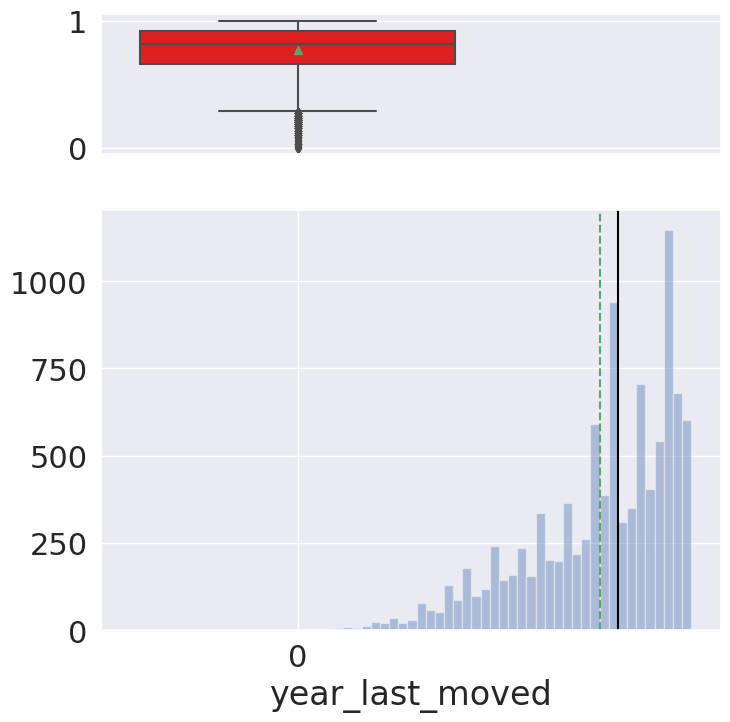

In [ ]:
histogram_boxplot(df.year_last_moved)

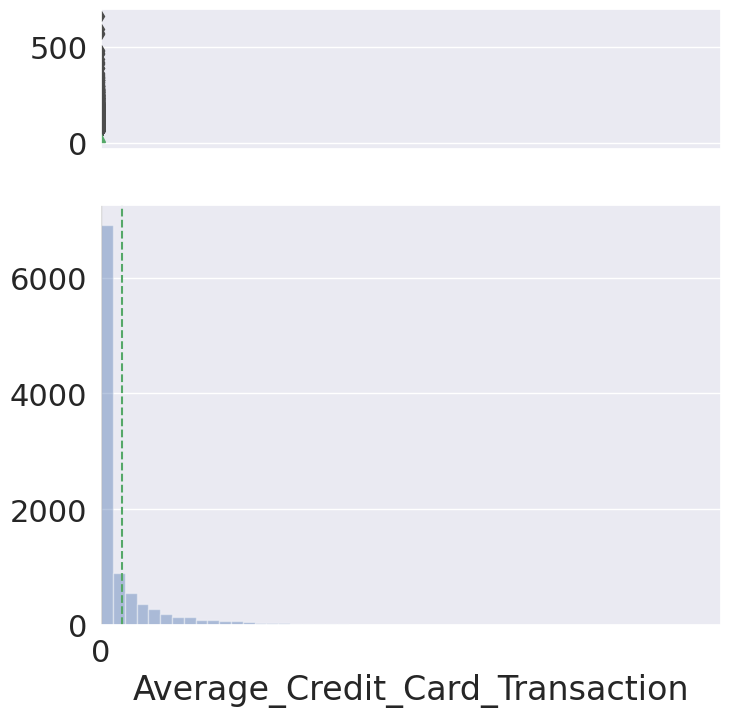

In [ ]:
histogram_boxplot(df.Average_Credit_Card_Transaction)

In [ ]:
# very skewwed data
# we use log transformation but we have lots of zeros in data we will do log1.

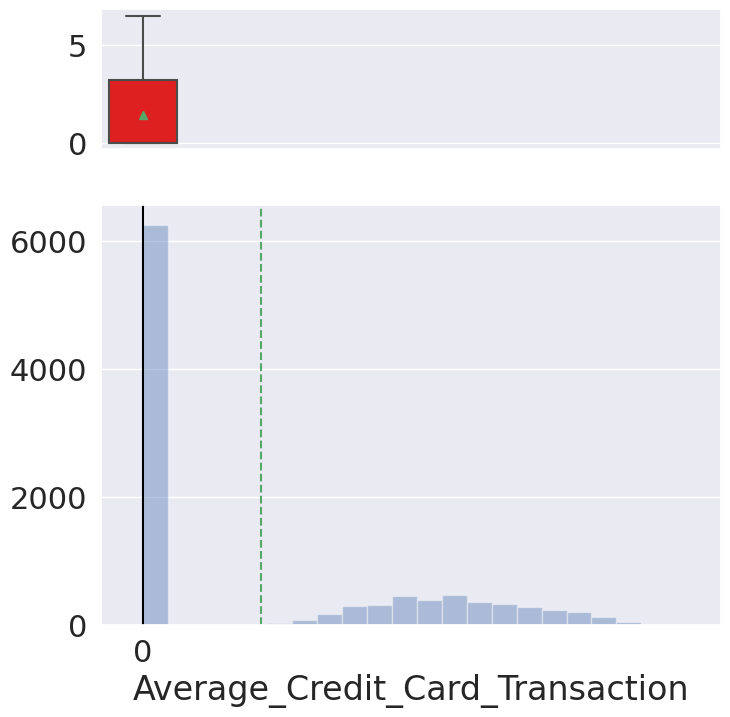

In [ ]:
histogram_boxplot(np.log1p(df.Average_Credit_Card_Transaction))

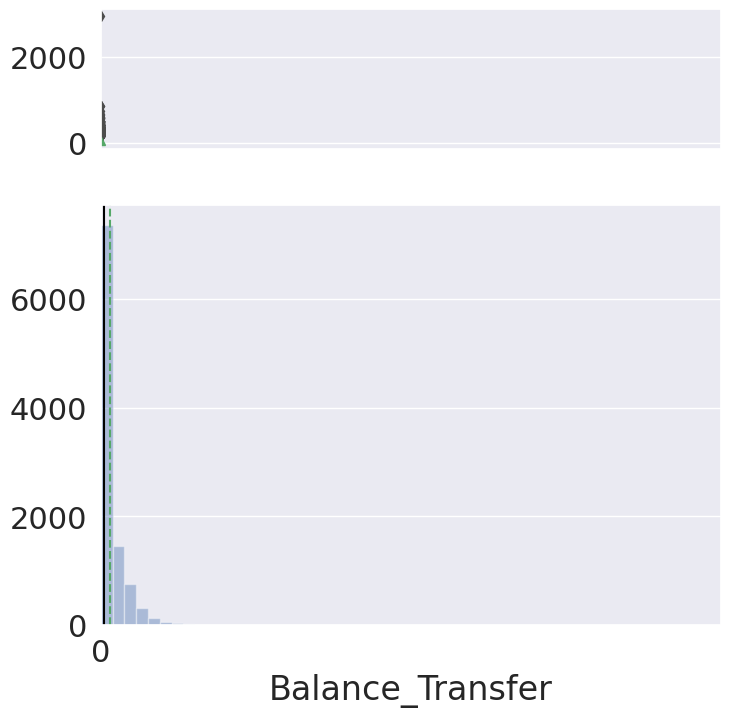

In [ ]:
histogram_boxplot(df.Balance_Transfer)

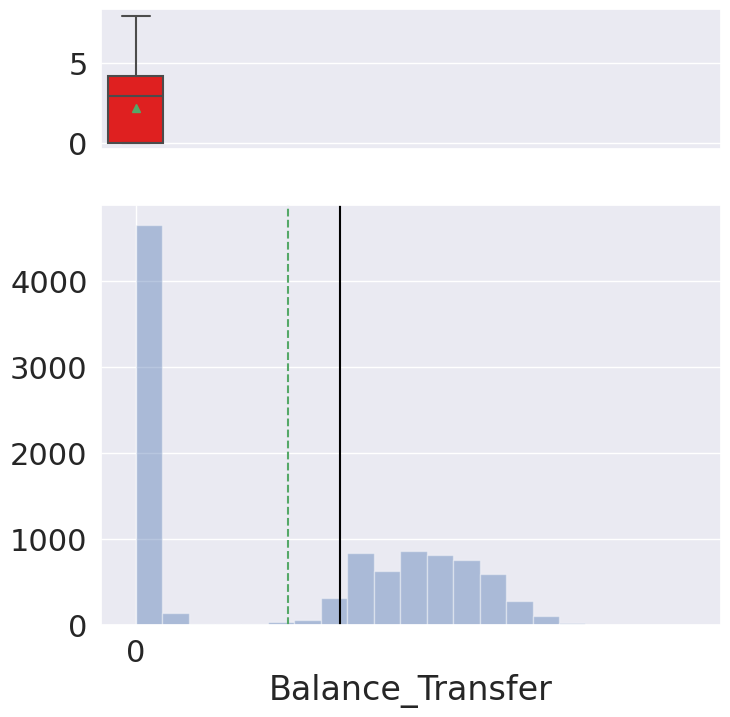

In [ ]:
df.Balance_Transfer=np.log1p(df.Balance_Transfer)
histogram_boxplot(df.Balance_Transfer)

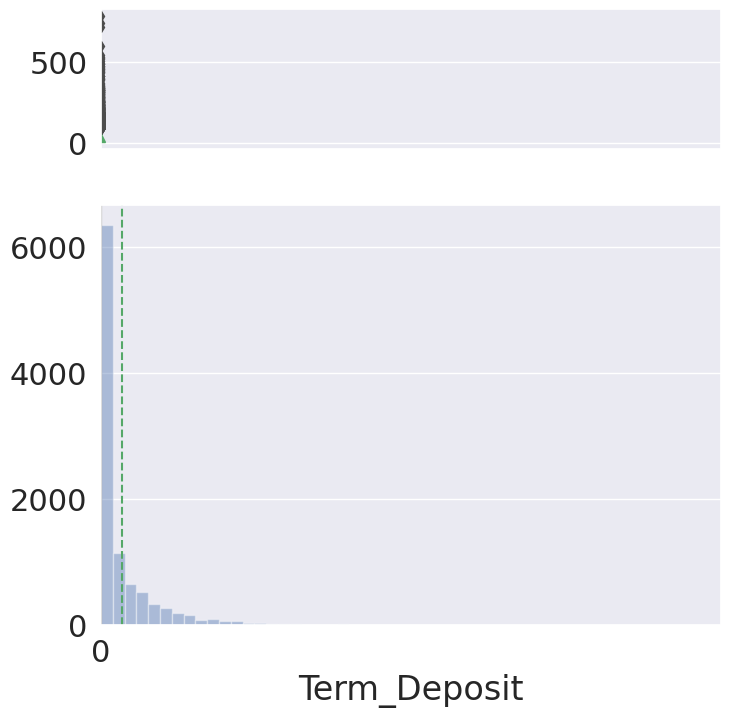

In [ ]:
histogram_boxplot(df.Term_Deposit)

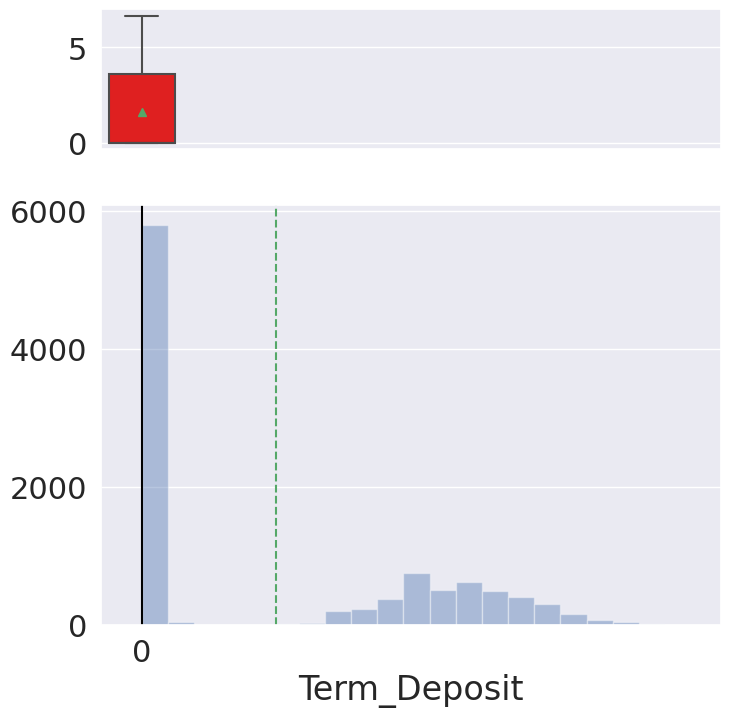

In [ ]:
histogram_boxplot(np.log1p(df.Term_Deposit))

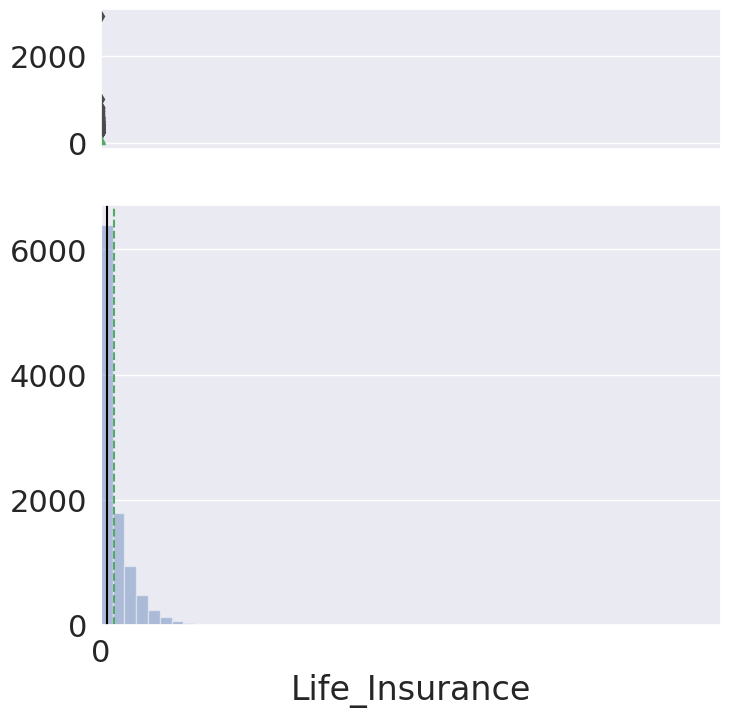

In [ ]:
histogram_boxplot(df.Life_Insurance)

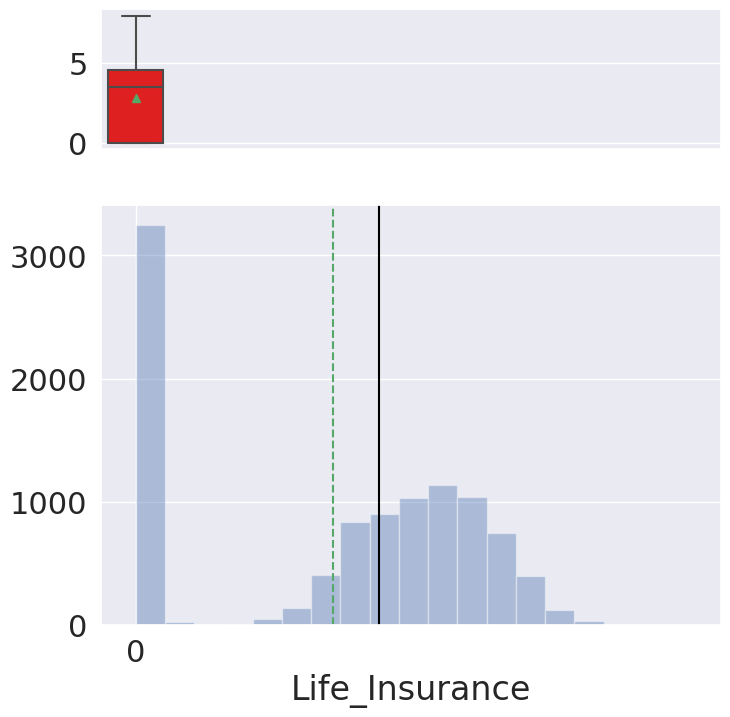

In [ ]:
histogram_boxplot(np.log1p(df.Life_Insurance))

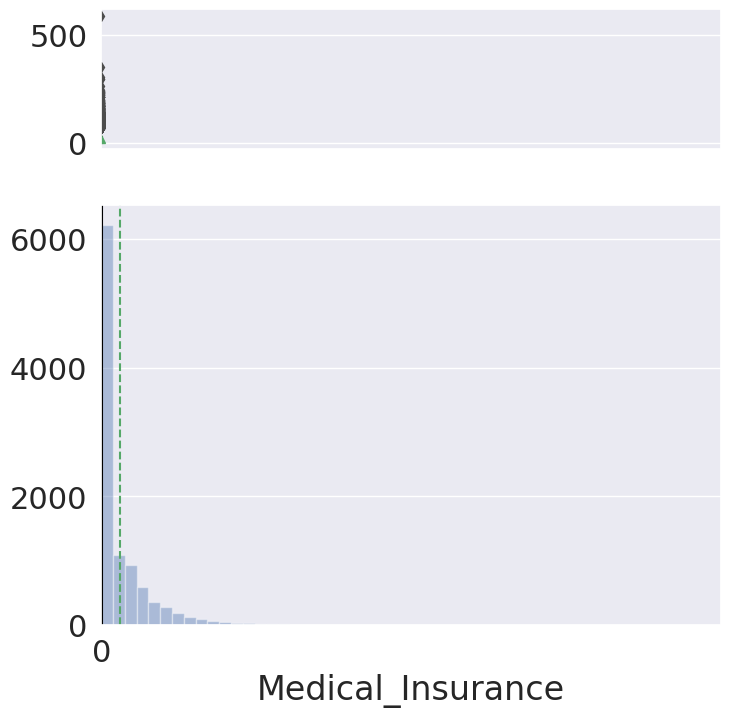

In [ ]:
histogram_boxplot(df.Medical_Insurance)

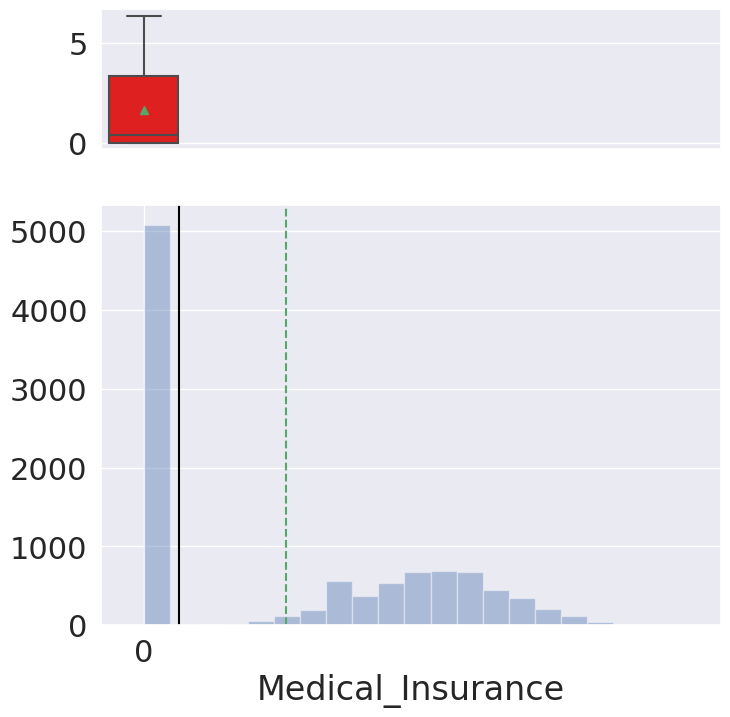

In [ ]:
histogram_boxplot(np.log1p(df.Medical_Insurance))

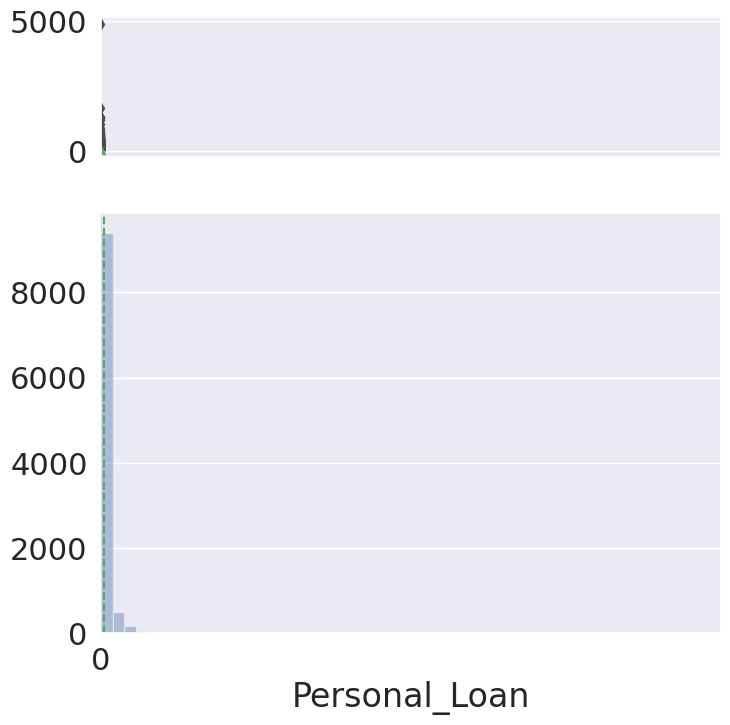

In [ ]:
histogram_boxplot(df.Personal_Loan)

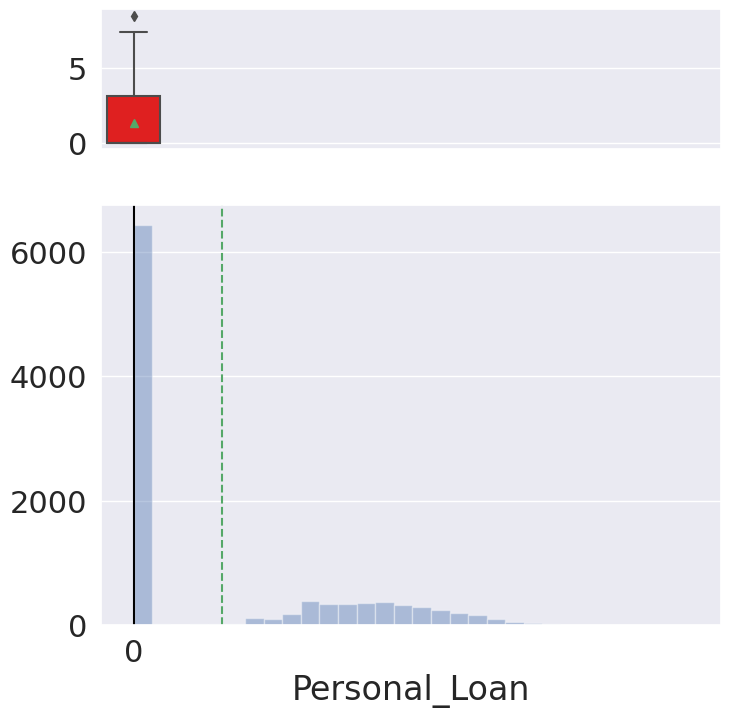

In [ ]:
histogram_boxplot(np.log1p(df.Personal_Loan))

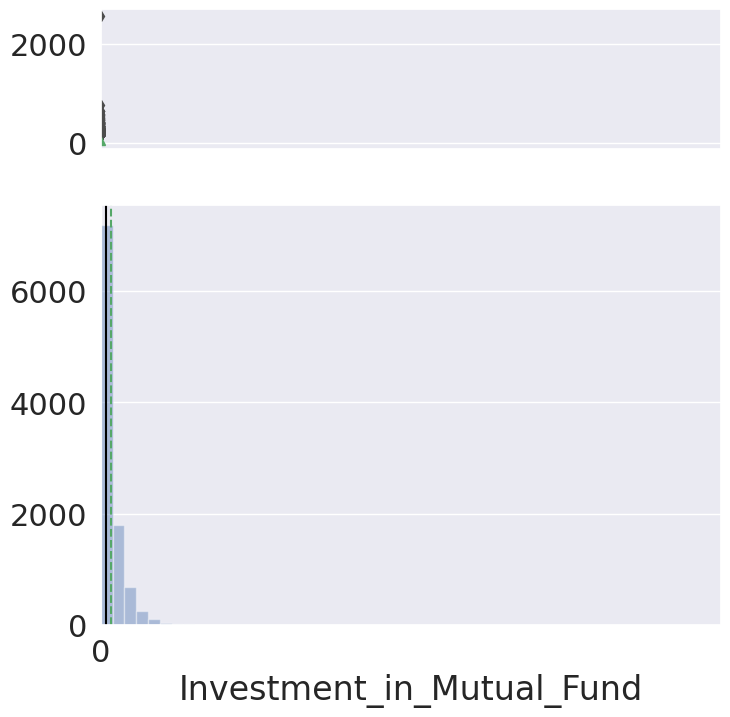

In [ ]:
histogram_boxplot(df.Investment_in_Mutual_Fund)

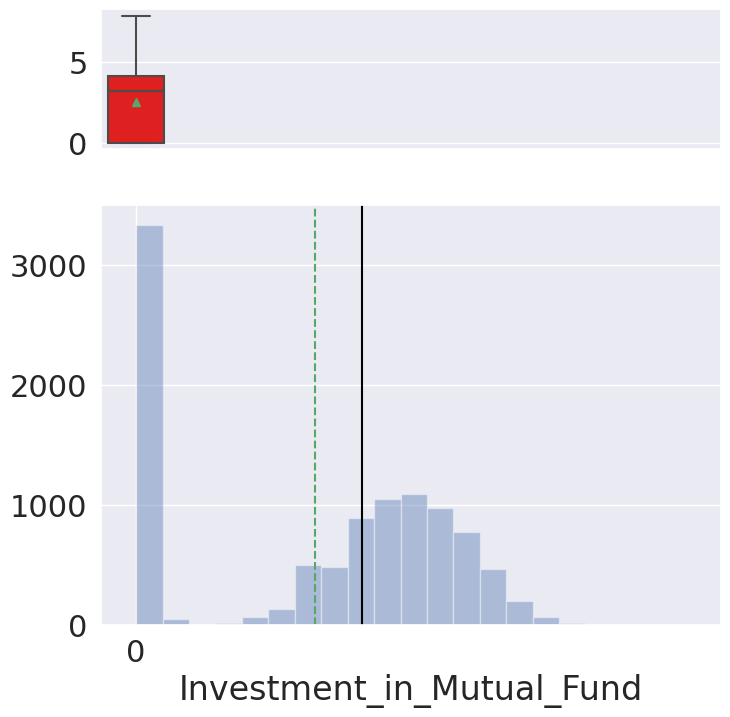

In [ ]:
histogram_boxplot(np.log1p(df.Investment_in_Mutual_Fund))

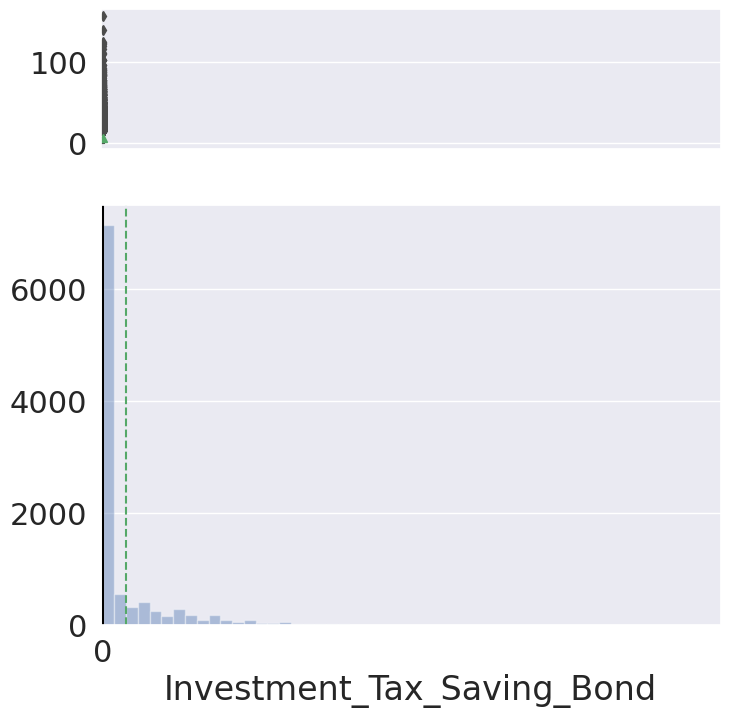

In [ ]:
histogram_boxplot(df.Investment_Tax_Saving_Bond)

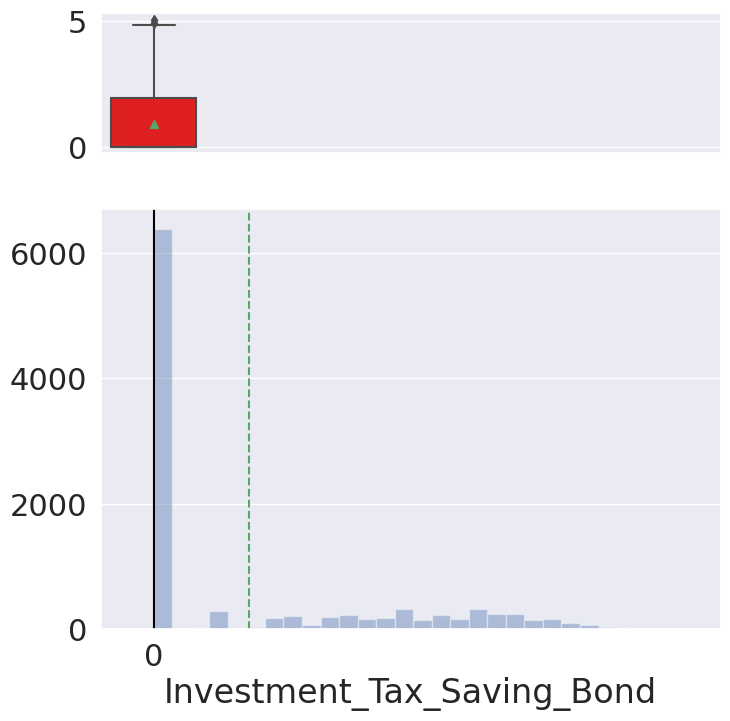

In [ ]:
histogram_boxplot(np.log1p(df.Investment_Tax_Saving_Bond))

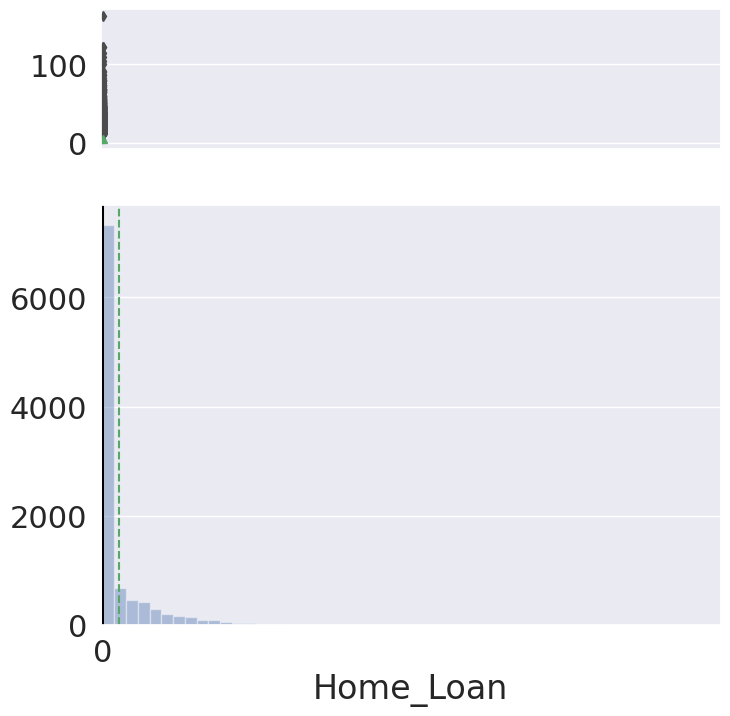

In [ ]:
histogram_boxplot(df.Home_Loan)

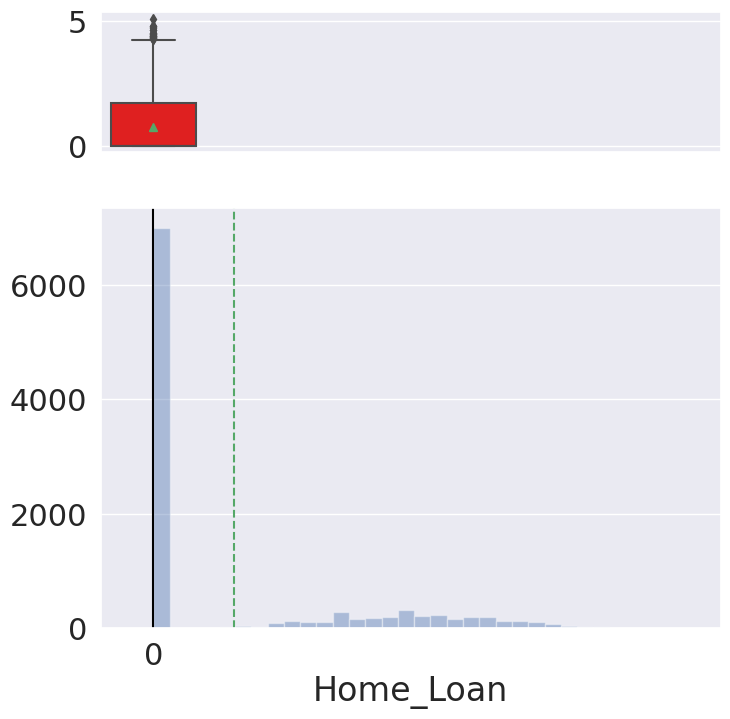

In [ ]:
histogram_boxplot(np.log1p(df.Home_Loan))

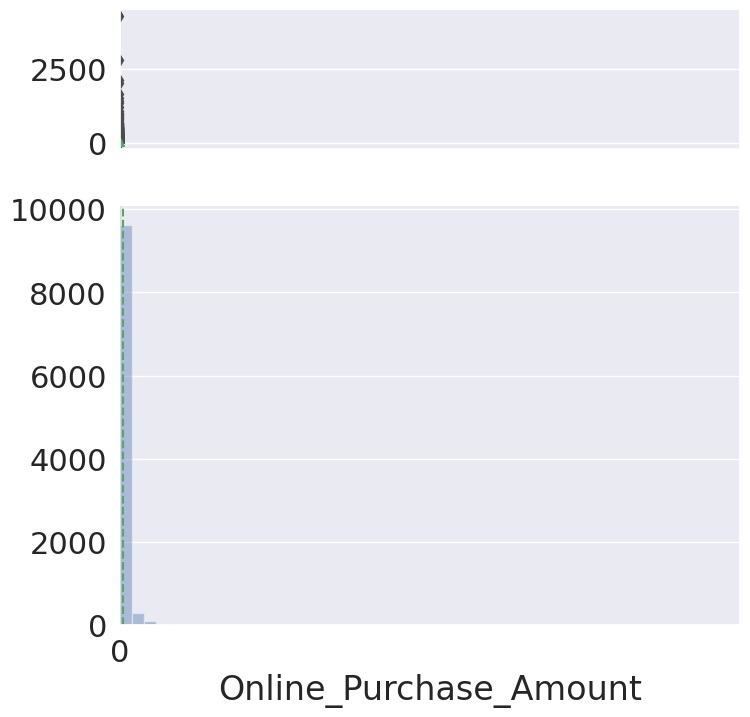

In [ ]:
histogram_boxplot(df.Online_Purchase_Amount)

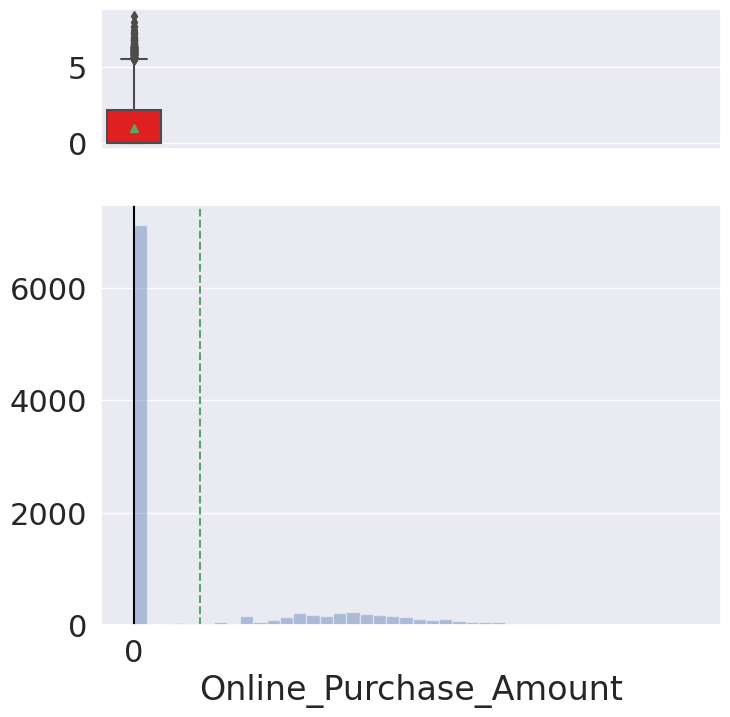

In [ ]:
histogram_boxplot(np.log1p(df.Online_Purchase_Amount))

In [ ]:
df.columns

Index(['children', 'age_band', 'status', 'occupation', 'occupation_partner',
       'home_status', 'self_employed', 'self_employed_partner',
       'year_last_moved', 'TVarea', 'Average_Credit_Card_Transaction',
       'Balance_Transfer', 'Term_Deposit', 'Life_Insurance',
       'Medical_Insurance', 'Average_A/C_Balance', 'Personal_Loan',
       'Investment_in_Mutual_Fund', 'Investment_Tax_Saving_Bond', 'Home_Loan',
       'Online_Purchase_Amount', 'Discount_Offering', 'gender', 'region',
       'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance'],
      dtype='object')

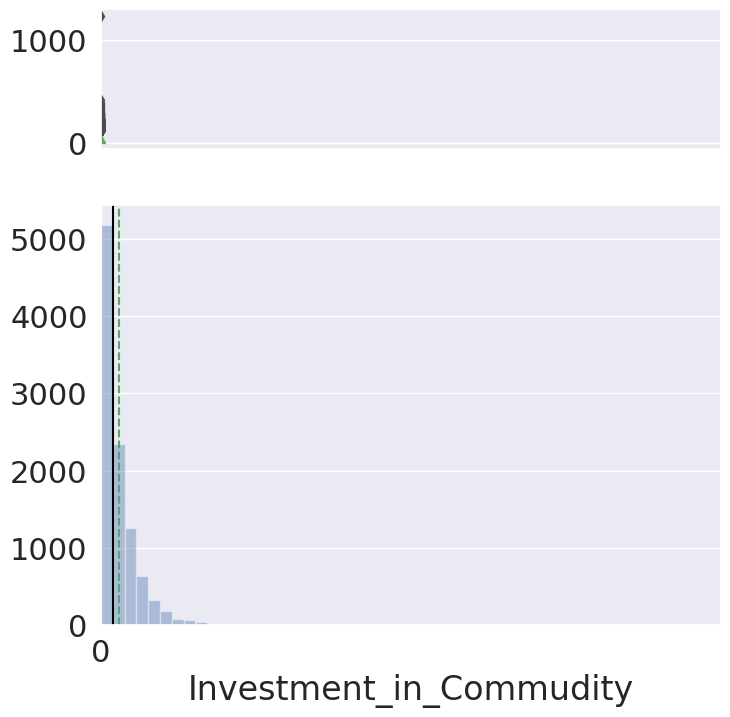

In [ ]:
histogram_boxplot(df.Investment_in_Commudity)

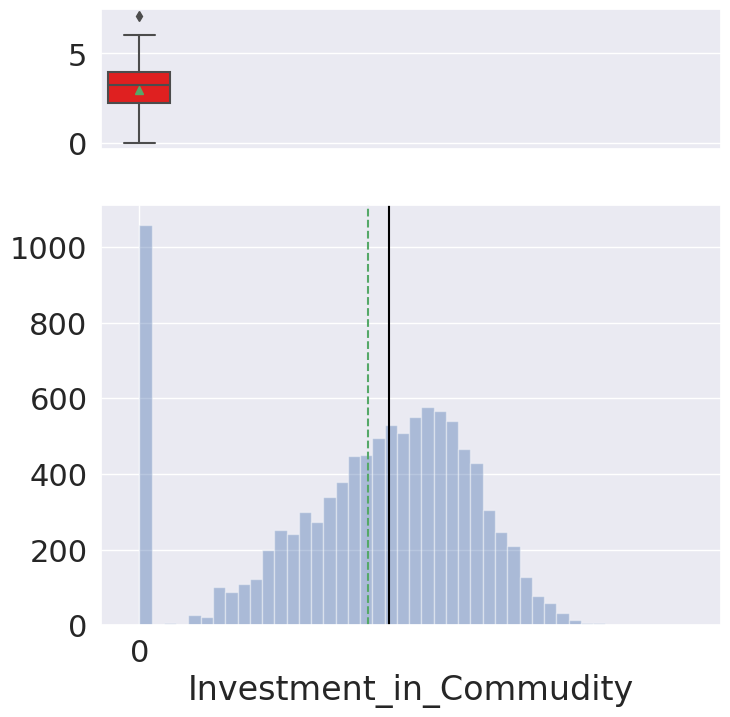

In [ ]:
histogram_boxplot(np.log1p(df.Investment_in_Commudity))

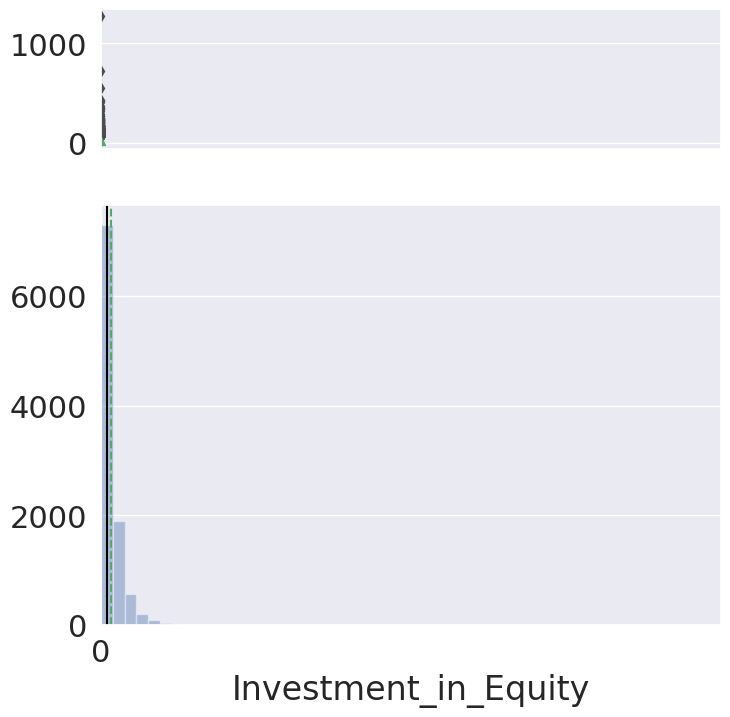

In [ ]:
histogram_boxplot(df.Investment_in_Equity)

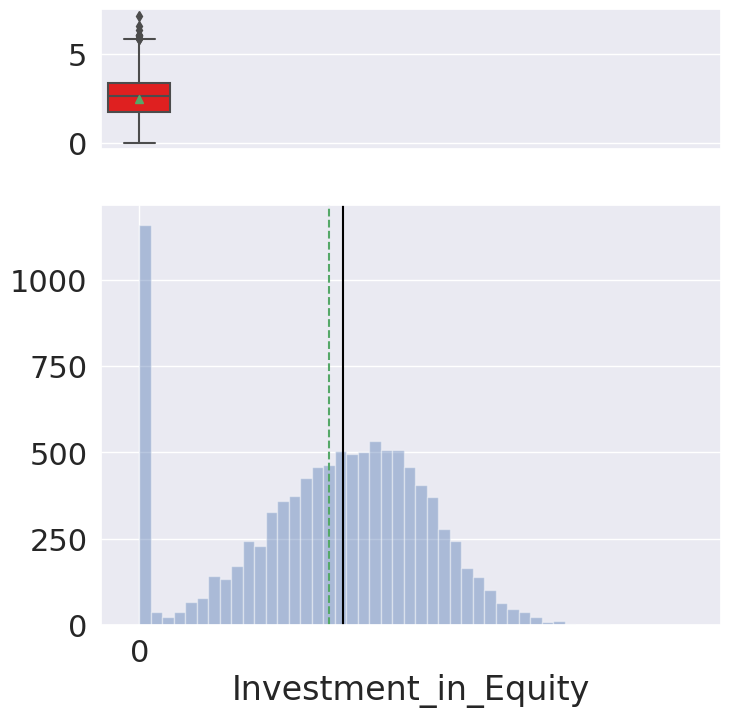

In [ ]:
histogram_boxplot(np.log1p(df.Investment_in_Equity))

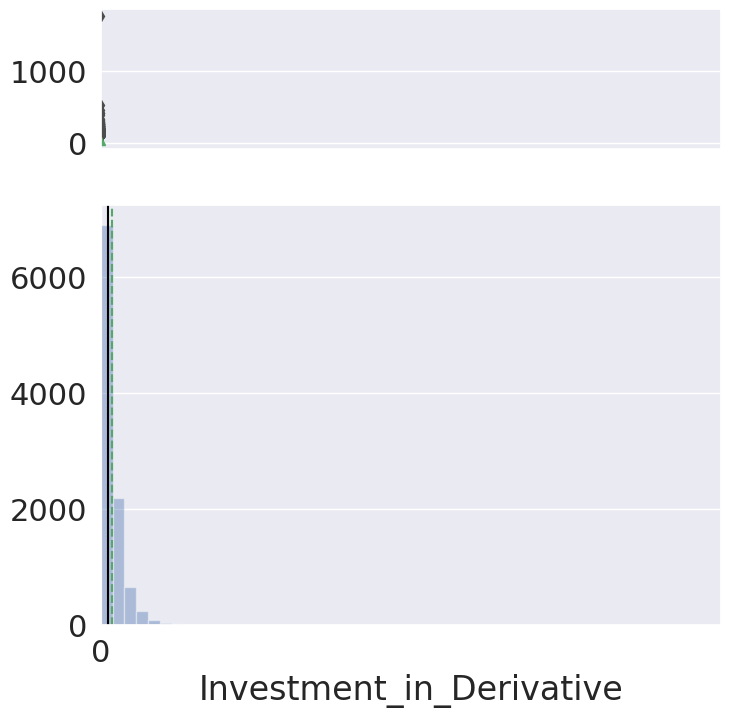

In [ ]:
histogram_boxplot(df.Investment_in_Derivative)

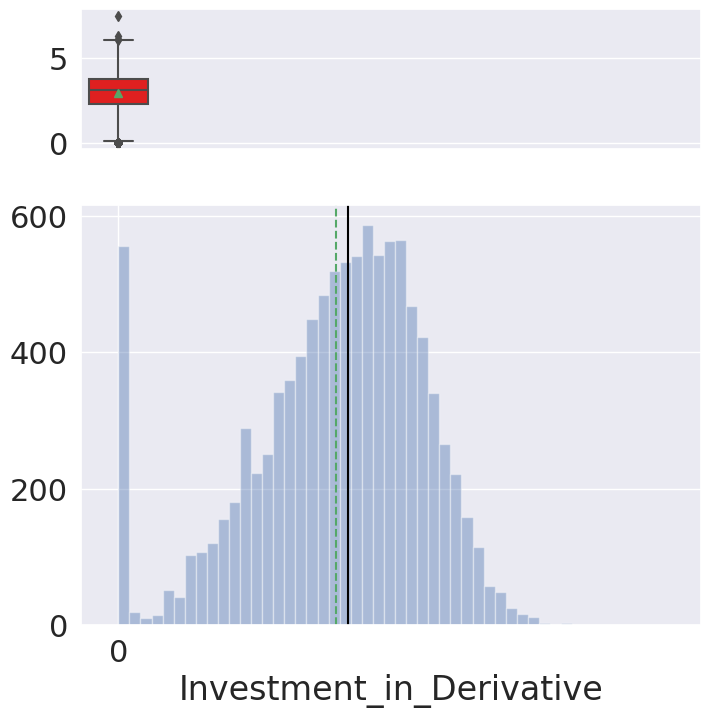

In [ ]:
histogram_boxplot(np.log1p(df.Investment_in_Derivative))

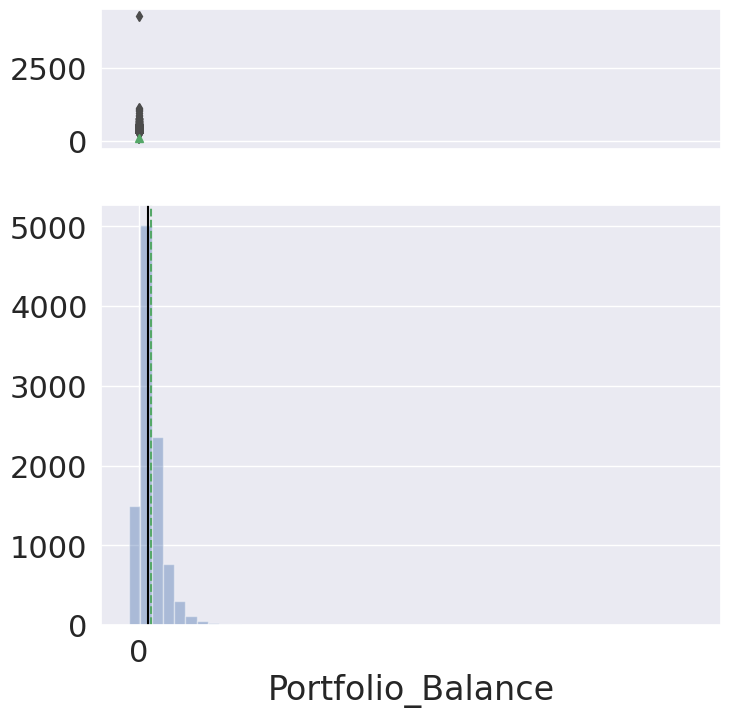

In [ ]:
histogram_boxplot(df.Portfolio_Balance)

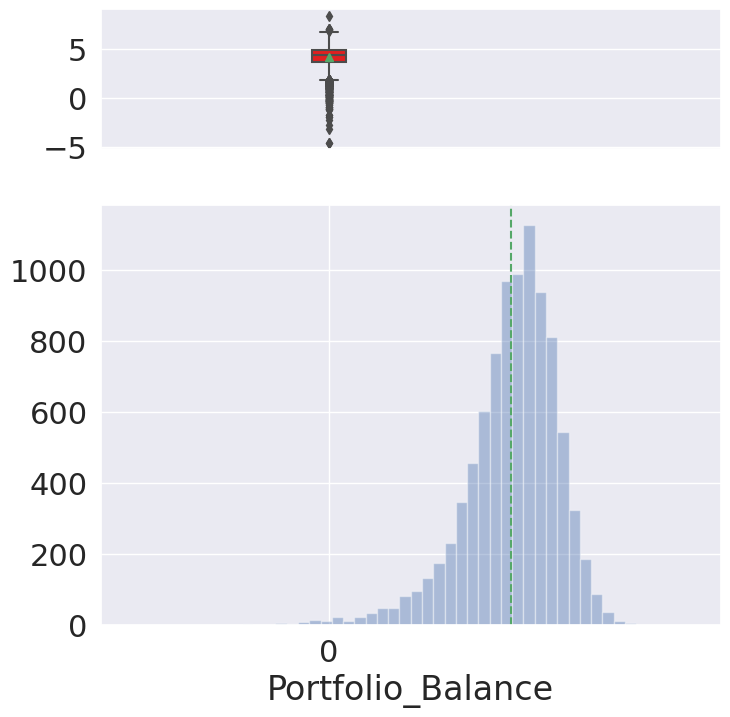

In [ ]:
histogram_boxplot(np.log1p(df.Portfolio_Balance))

# Distribution of each numerical column

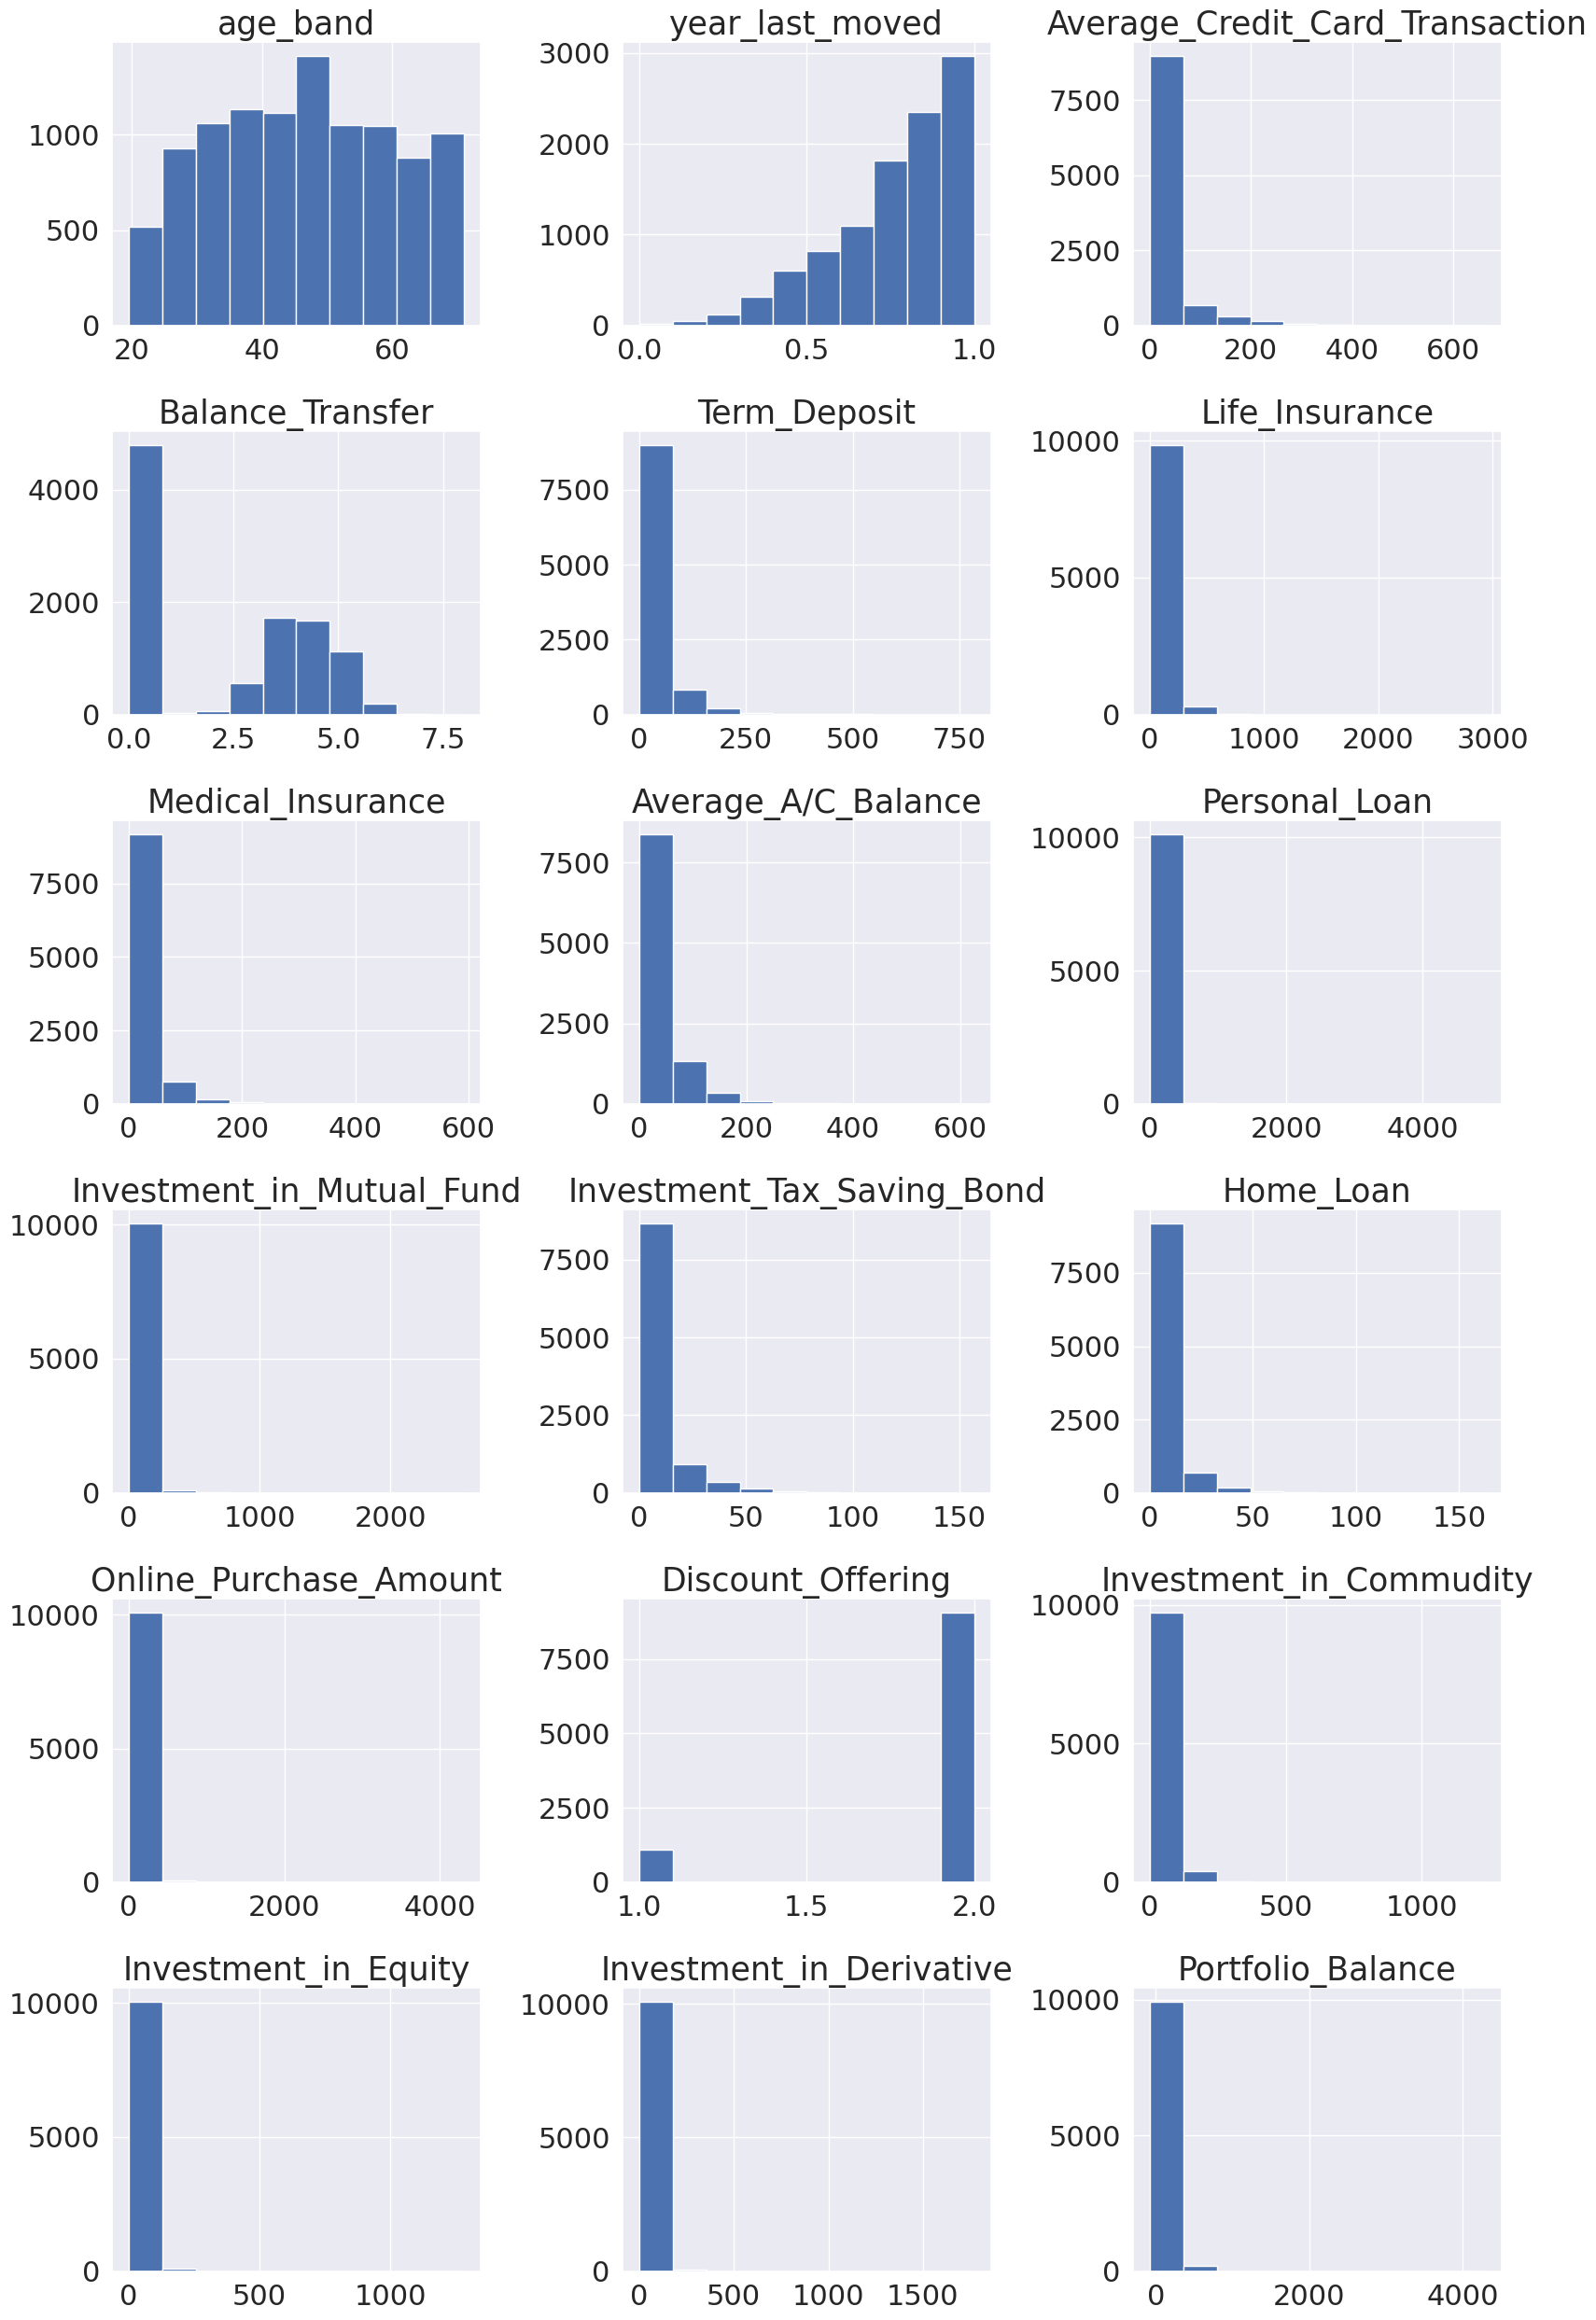

In [ ]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)


plt.show()

# Correlation

In [ ]:
correlation = df.corr()
correlation

age_band  year_last_moved  \
age_band                            1.000           -0.493   
year_last_moved                    -0.493            1.000   
Average_Credit_Card_Transaction    -0.034            0.012   
Balance_Transfer                   -0.026            0.008   
Term_Deposit                       -0.029            0.009   
Life_Insurance                     -0.047            0.026   
Medical_Insurance                  -0.027            0.012   
Average_A/C_Balance                -0.037            0.021   
Personal_Loan                      -0.093            0.041   
Investment_in_Mutual_Fund          -0.049            0.033   
Investment_Tax_Saving_Bond         -0.050            0.039   
Home_Loan                          -0.041            0.012   
Online_Purchase_Amount             -0.031            0.021   
Discount_Offering                   0.016           -0.016   
Investment_in_Commudity            -0.052            0.024   
Investment_in_Equity               -0.086            0.048   
Investment_in_Derivative           -0.079            0.042   
Portfolio_Balance                  -0.075            0.040   

                                 Average_Credit_Card_Transaction  \
age_band                                                  -0.034   
year_last_moved                                            0.012   
Average_Credit_Card_Transaction                            1.000   
Balance_Transfer                                           0.098   
Term_Deposit                                               0.323   
Life_Insurance                                             0.145   
Medical_Insurance                                          0.405   
Average_A/C_Balance                                        0.172   
Personal_Loan                                              0.087   
Investment_in_Mutual_Fund                                  0.151   
Investment_Tax_Saving_Bond                                 0.133   
Home_Loan                                                  0.088   
Online_Purchase_Amount                                     0.133   
Discount_Offering                                         -0.265   
Investment_in_Commudity                                    0.497   
Investment_in_Equity                                       0.205   
Investment_in_Derivative                                   0.228   
Portfolio_Balance                                          0.336   

                                 Balance_Transfer  Term_Deposit  \
age_band                                   -0.026        -0.029   
year_last_moved                             0.008         0.009   
Average_Credit_Card_Transaction             0.098         0.323   
Balance_Transfer                            1.000         0.181   
Term_Deposit                                0.181         1.000   
Life_Insurance                              0.453         0.275   
Medical_Insurance                           0.137         0.506   
Average_A/C_Balance                         0.350         0.274   
Personal_Loan                               0.121         0.147   
Investment_in_Mutual_Fund                   0.291         0.209   
Investment_Tax_Saving_Bond                  0.149         0.177   
Home_Loan                                   0.161         0.171   
Online_Purchase_Amount                      0.074         0.099   
Discount_Offering                          -0.081        -0.012   
Investment_in_Commudity                     0.566         0.620   
Investment_in_Equity                        0.287         0.267   
Investment_in_Derivative                    0.402         0.354   
Portfolio_Balance                           0.456         0.455   

                                 Life_Insurance  Medical_Insurance  \
age_band                                 -0.047             -0.027   
year_last_moved                           0.026              0.012   
Average_Credit_Card_Transaction           0.145              0.405   
Balance

<Axes: >

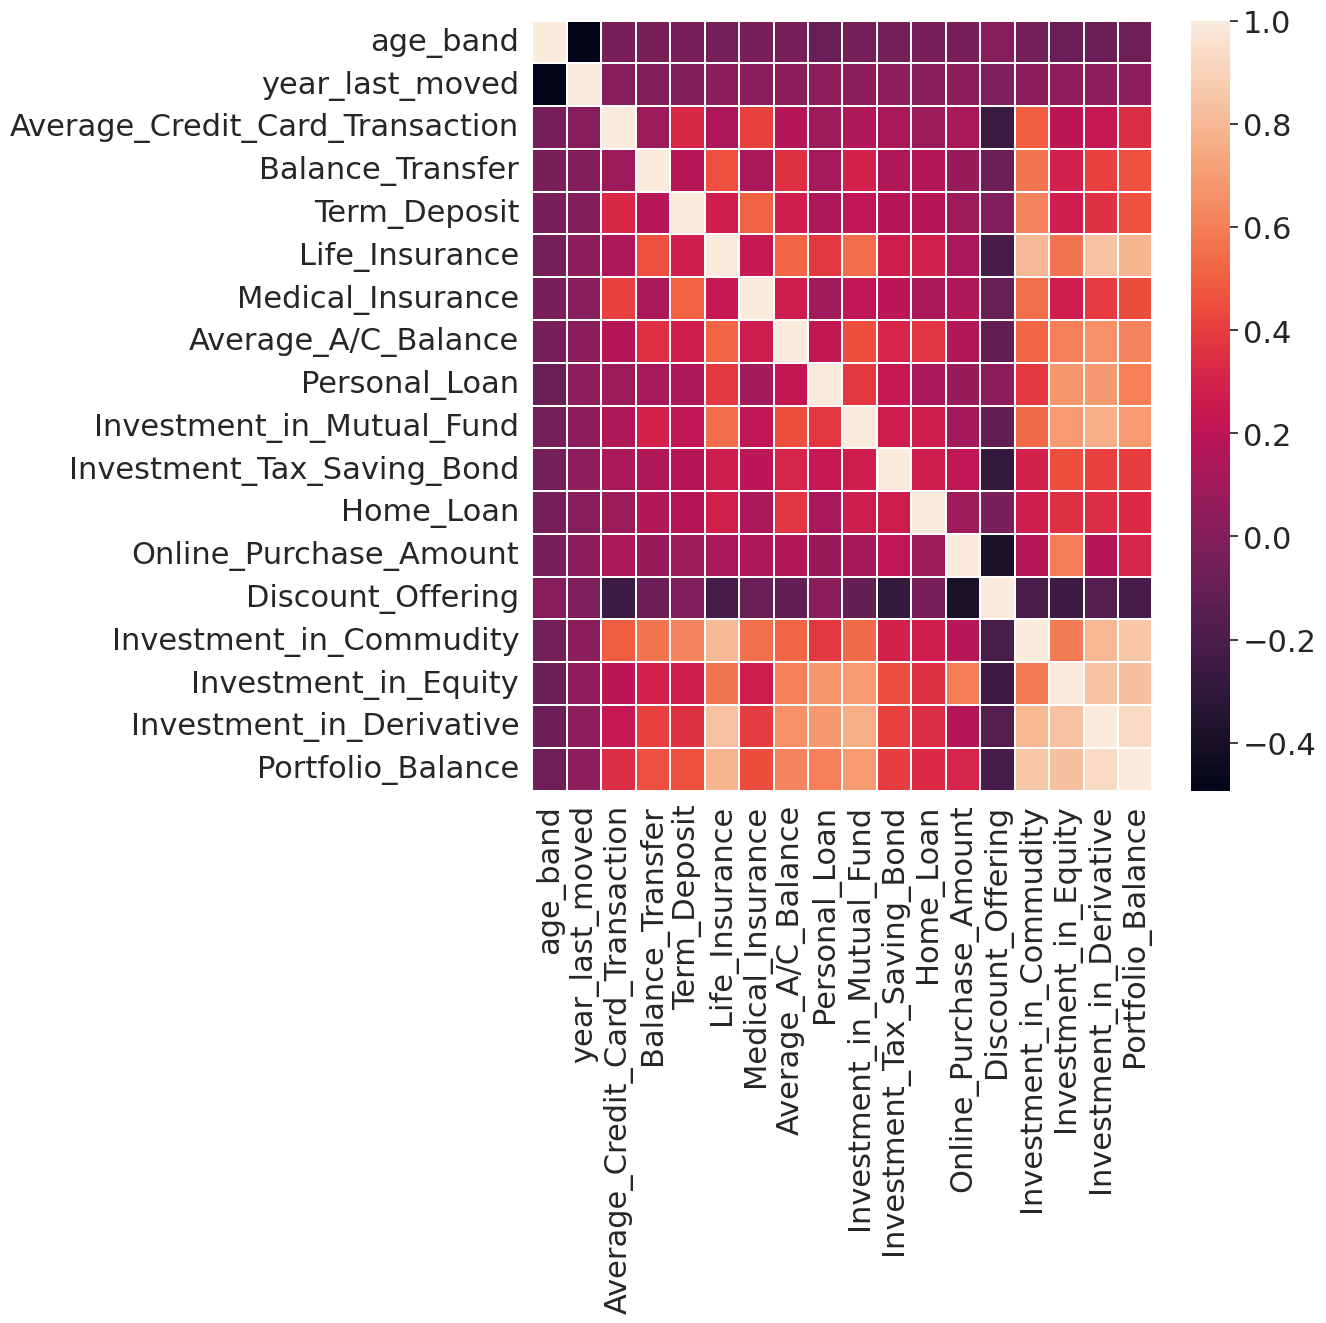

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=False, linewidths=.3, fmt= '1.0001f',ax=ax)

In [ ]:
# now lets see catogrical columns.

In [ ]:
df.columns


Index(['children', 'age_band', 'status', 'occupation', 'occupation_partner',
       'home_status', 'self_employed', 'self_employed_partner',
       'year_last_moved', 'TVarea', 'Average_Credit_Card_Transaction',
       'Balance_Transfer', 'Term_Deposit', 'Life_Insurance',
       'Medical_Insurance', 'Average_A/C_Balance', 'Personal_Loan',
       'Investment_in_Mutual_Fund', 'Investment_Tax_Saving_Bond', 'Home_Loan',
       'Online_Purchase_Amount', 'Discount_Offering', 'gender', 'region',
       'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance'],
      dtype='object')

Text(0, 0.5, 'count')

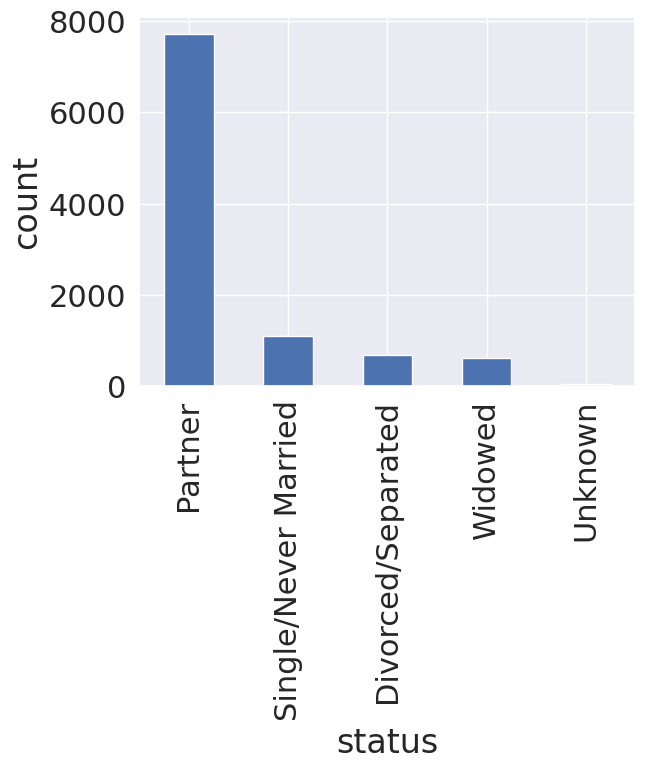

In [ ]:
df['status'].value_counts().plot(kind='bar')
plt.xlabel('status')
plt.ylabel('count')

In [ ]:
# lets combine single,divorce,widow in one
# convert unkown of max of single or partner

In [ ]:
df.status.unique()

array(['Partner', 'Single/Never Married', 'Widowed', 'Divorced/Separated',
       'Unknown'], dtype=object)

In [ ]:
# Assuming your DataFrame is named df and the column is "status"
df['status'] = df['status'].replace(['Divorced/Separated', 'Widowed'], 'Single/Never Married')


In [ ]:
mode_value = df['status'].mode().iloc[0]
df['status'] = df['status'].replace('Unknown', mode_value)

Text(0, 0.5, 'count')

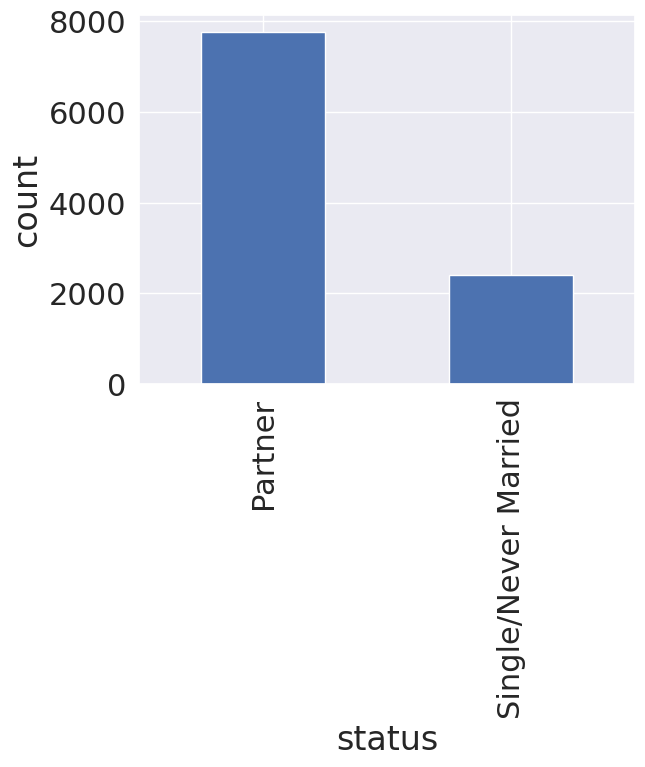

In [ ]:
df['status'].value_counts().plot(kind='bar')
plt.xlabel('status')
plt.ylabel('count')

Text(0, 0.5, 'count')

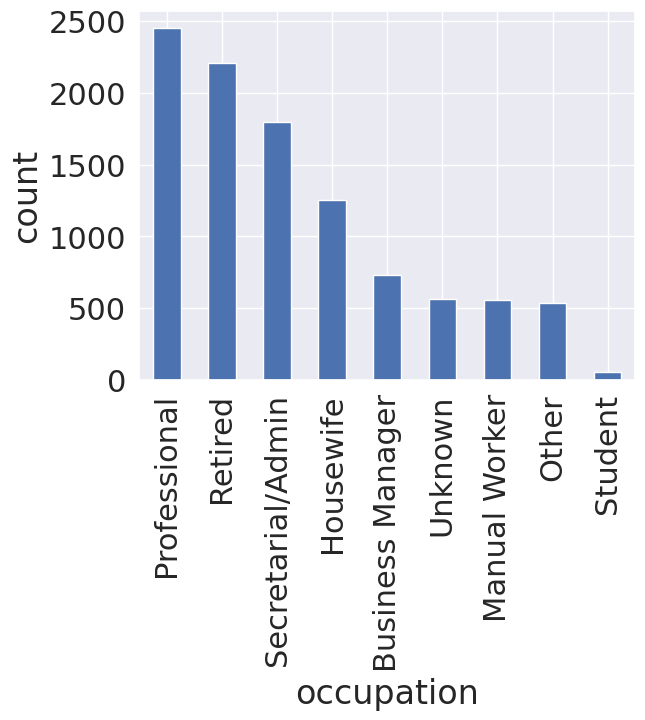

In [ ]:
df['occupation'].value_counts().plot(kind='bar')
plt.xlabel('occupation')
plt.ylabel('count')

In [ ]:
# we cant merge the values over here so leave it

Text(0, 0.5, 'count')

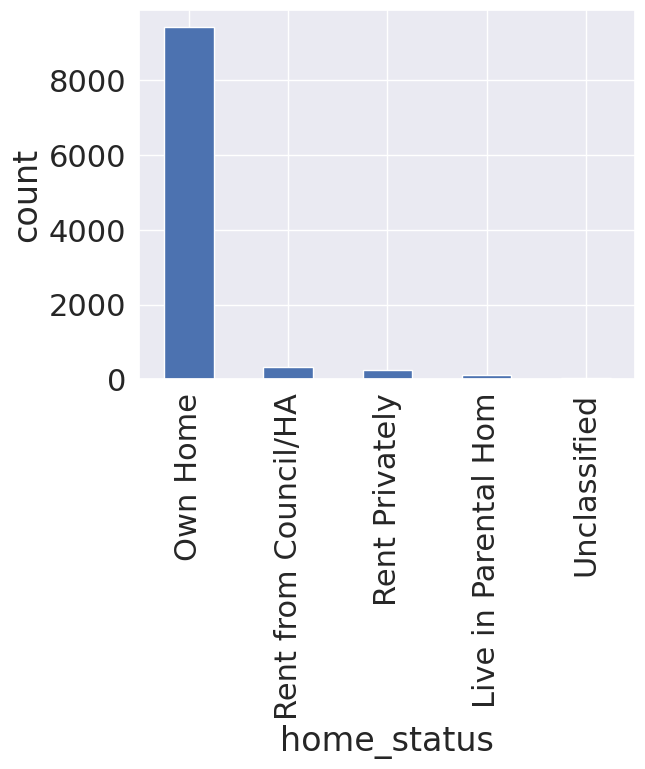

In [ ]:
df['home_status'].value_counts().plot(kind='bar')
plt.xlabel('home_status')
plt.ylabel('count')

In [ ]:
#  here we can merge all in rent ,beside own home
df['home_status'].unique()

array(['Own Home', 'Rent from Council/HA', 'Rent Privately',
       'Live in Parental Hom', 'Unclassified'], dtype=object)

In [ ]:
df['home_status'] = df['home_status'].replace(['Rent from Council/HA','Live in Parental Hom', 'Unclassified'], 'Rent Privately')

Text(0, 0.5, 'count')

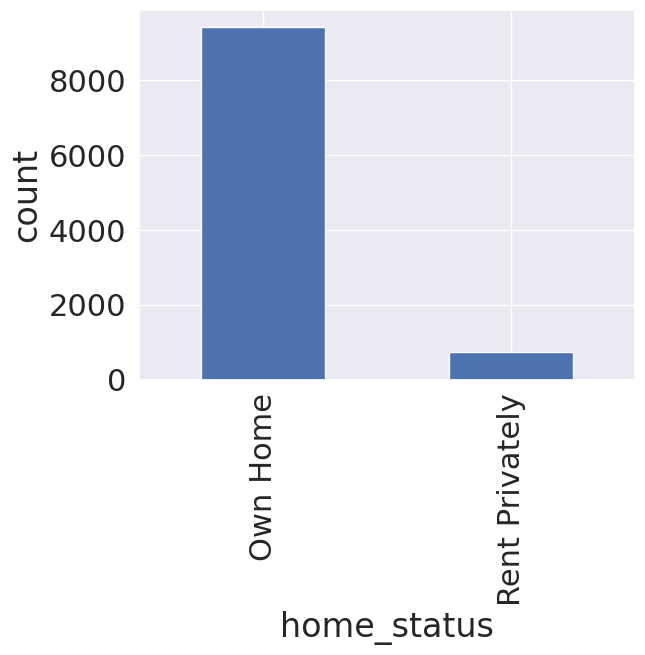

In [ ]:
df['home_status'].value_counts().plot(kind='bar')
plt.xlabel('home_status')
plt.ylabel('count')

Text(0, 0.5, 'count')

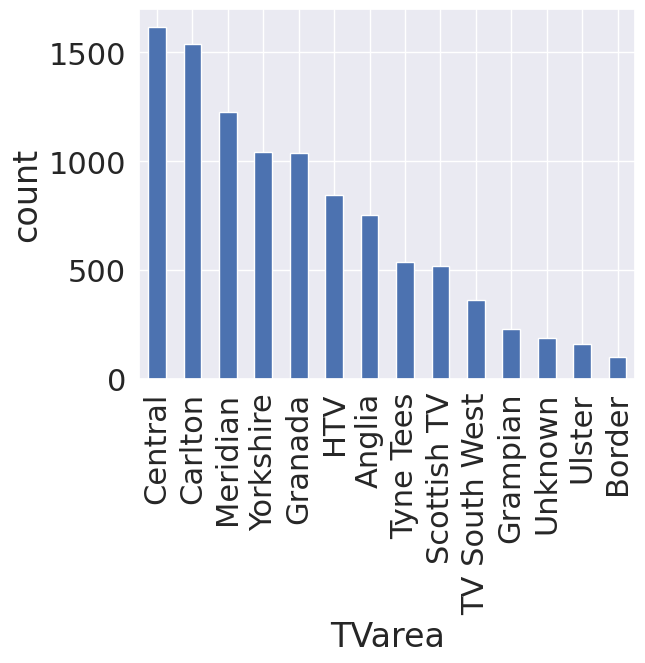

In [ ]:
df['TVarea'].value_counts().plot(kind='bar')
plt.xlabel('TVarea')
plt.ylabel('count')

In [ ]:
#  here data is nicely distributed no need do changes.

Text(0, 0.5, 'count')

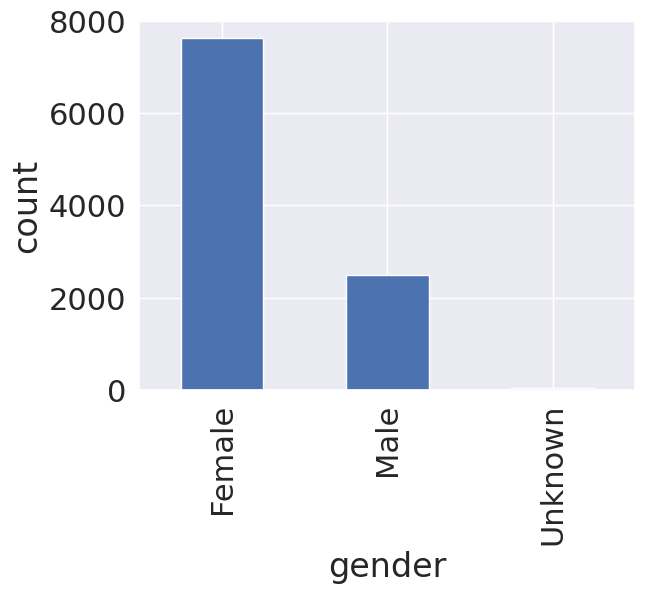

In [ ]:
df['gender'].value_counts().plot(kind='bar')
plt.xlabel('gender')
plt.ylabel('count')

In [ ]:
df.gender.value_counts()

Female     7634
Male       2486
Unknown      35
Name: gender, dtype: int64

In [ ]:
#  here replace unknown with mode of gender

In [ ]:
mode_value = df['gender'].mode().iloc[0]
df['gender'] = df['gender'].replace('Unknown', mode_value)

Text(0, 0.5, 'count')

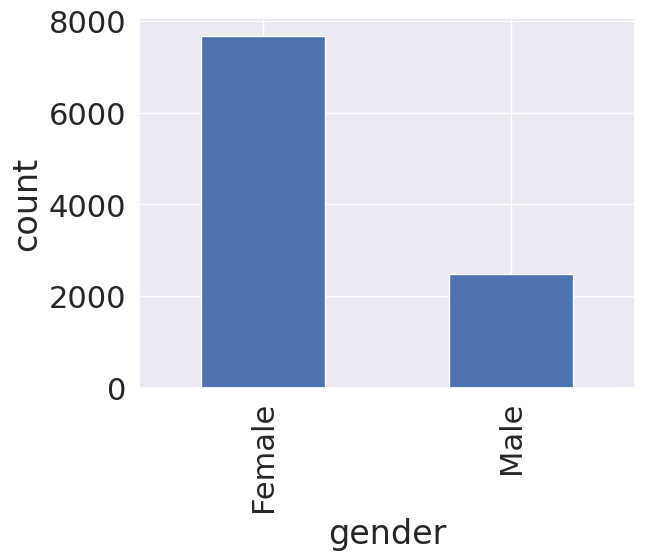

In [ ]:
df['gender'].value_counts().plot(kind='bar')
plt.xlabel('gender')
plt.ylabel('count')

# Checking Outliers

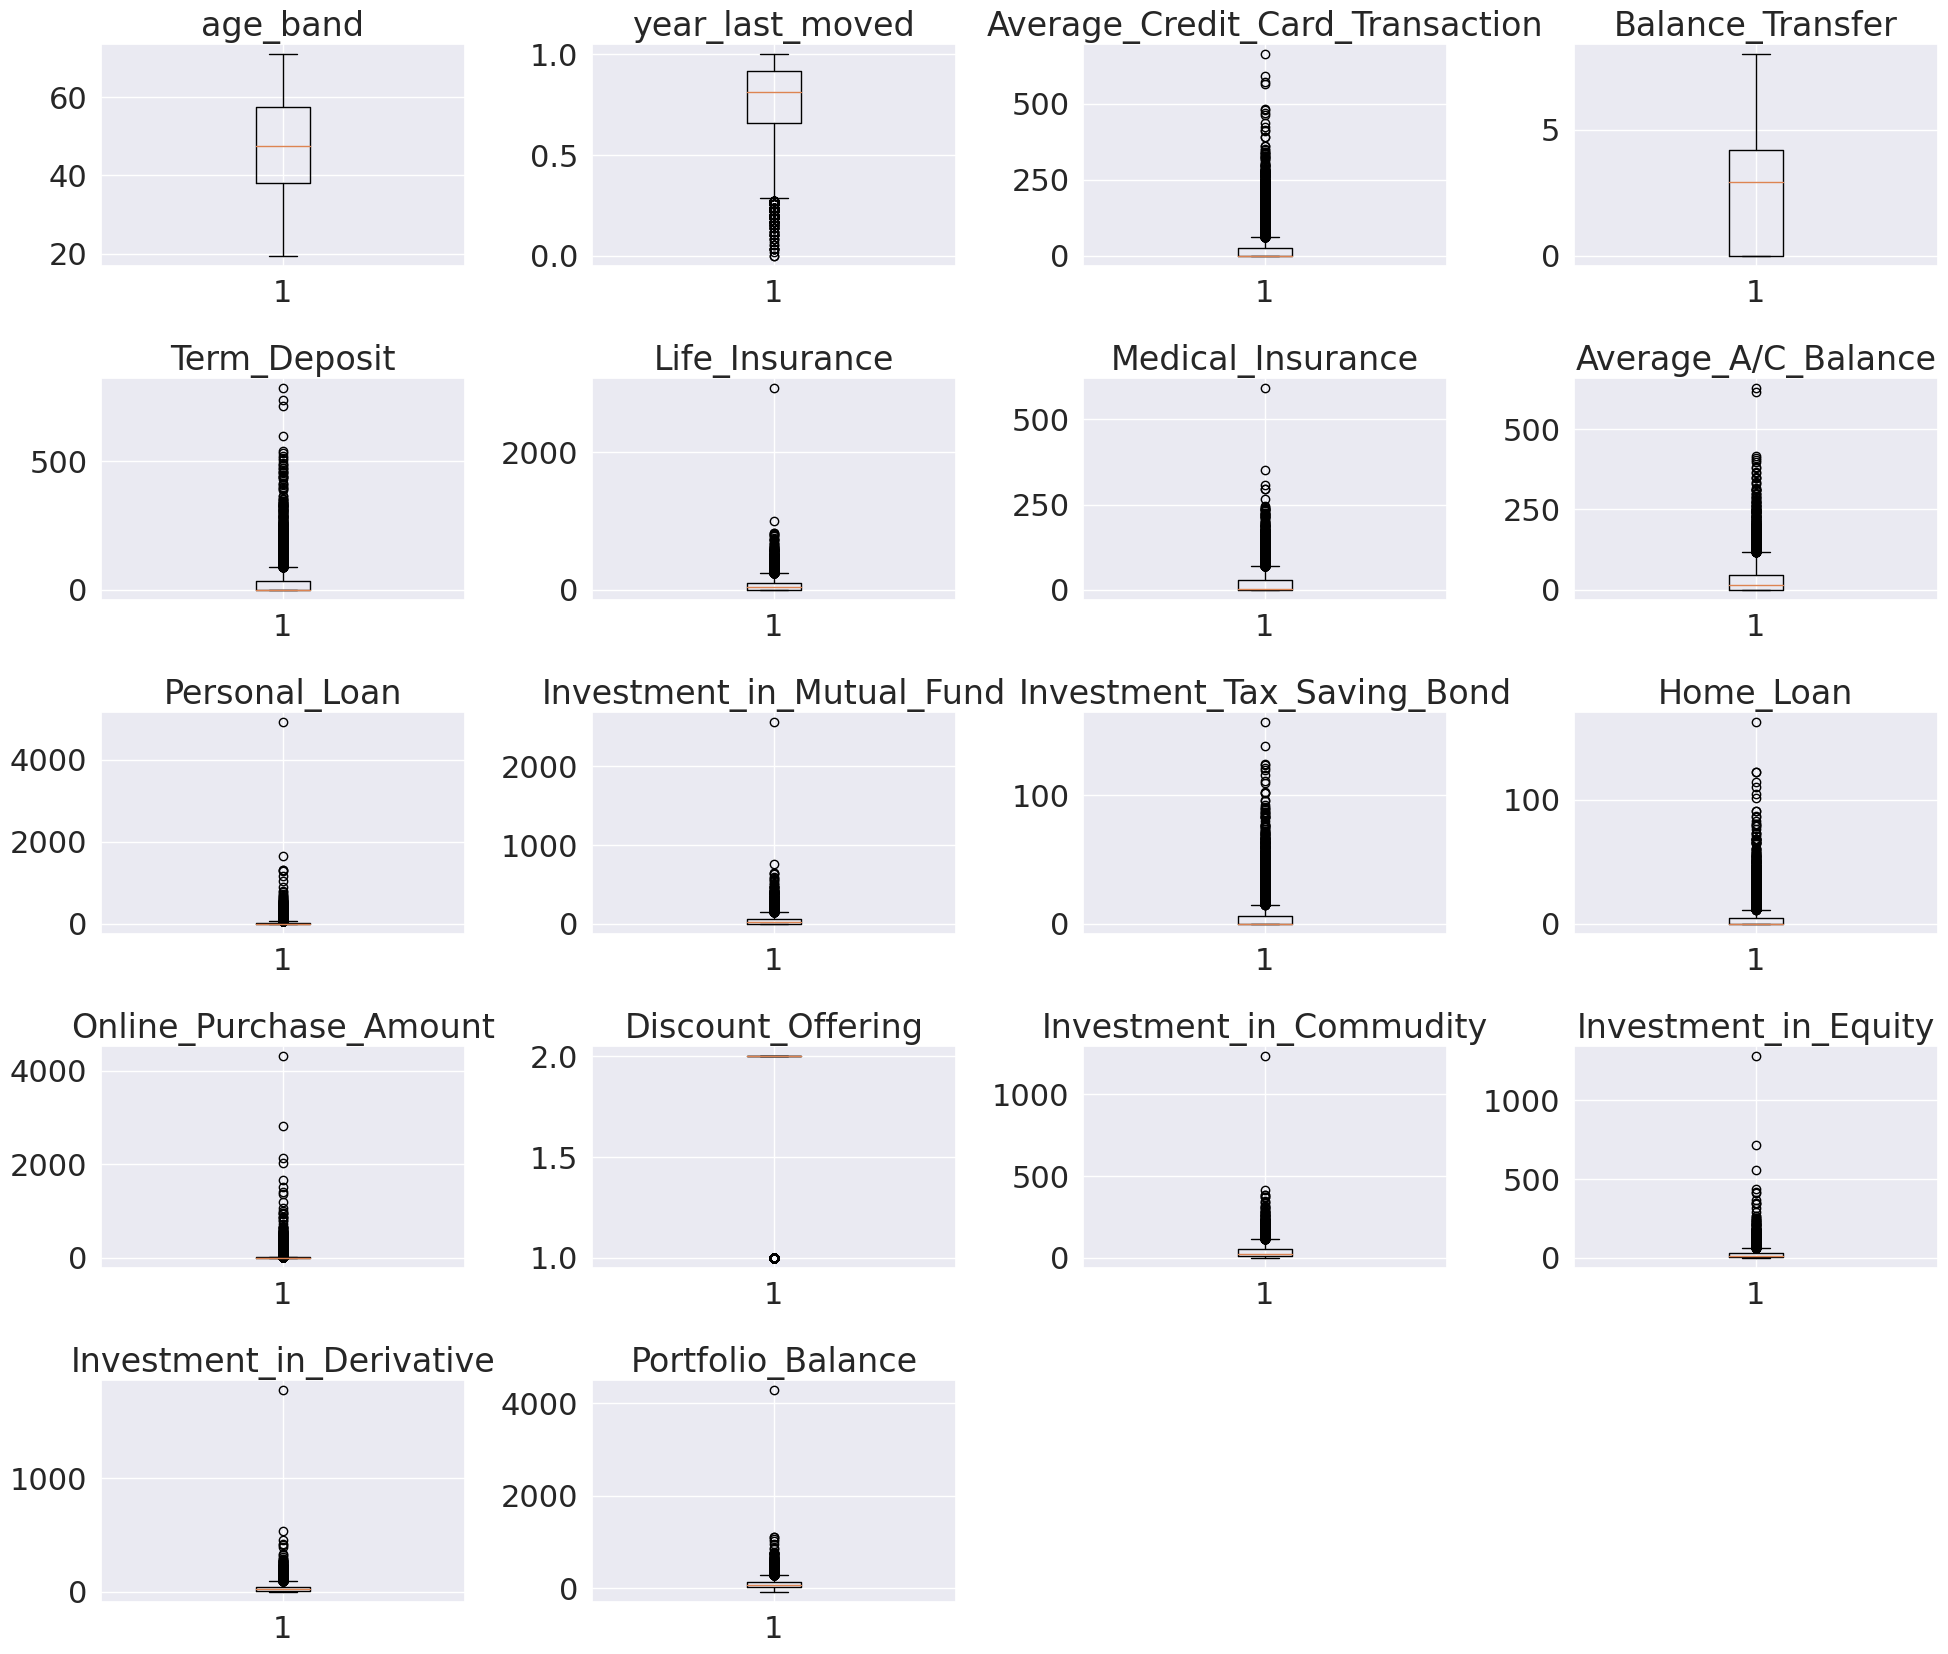

In [ ]:
#outlier detection using boxplot
plt.figure(figsize=(20,30))
for i ,variable in enumerate(all_col):
  plt.subplot(9,4,i+1)
  plt.boxplot(df[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()

In [ ]:
df['Discount_Offering'] = df['Discount_Offering'].replace({2:0,1:1})

In [ ]:
# cross_tab = pd.crosstab(df['TVarea'], df['Discount_Offering'], normalize='index')  # Include row percentages

In [ ]:
# creating dummy variables for object columns
object_columns = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=object_columns, drop_first=True)

# Splitting data

In [ ]:
#Model Building
#Defining the x variables and Y variable/Target Variable.

x = df.drop(['Discount_Offering'], axis=1)
y = df[['Discount_Offering']]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=45)

In [ ]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(3047, 67)
(7108, 67)
(3047, 1)
(7108, 1)


In [ ]:
x_train.head()

age_band  year_last_moved  Average_Credit_Card_Transaction  \
1553    28.000            0.881                            0.000   
1233    67.500            0.966                           28.970   
1482    43.000            0.593                           19.990   
2520    43.000            1.000                           14.990   
9778    43.000            0.814                           31.990   

      Balance_Transfer  Term_Deposit  Life_Insurance  Medical_Insurance  \
1553             3.113        24.990           0.000             67.410   
1233             3.922         0.000          47.980             47.970   
1482             3.434         0.000           0.000             37.450   
2520             4.430        27.990          35.970             32.980   
9778             3.020        39.990           7.450             15.990   

      Average_A/C_Balance  Personal_Loan  Investment_in_Mutual_Fund  ...  \
1553               11.970         40.460                     51.970  ...   
1233               28.490          0.000                      0.000  ...   
1482               35.960        172.330                      0.010  ...   
2520               38.920         53.950                     59.950  ...   
9778               35.470         11.490                      0.000  ...   

      region_Isle of Man  region_North  region_North West  \
1553                   0             0                  1   
1233                   0             0                  0   
1482                   0             0                  0   
2520                   0             0                  0   
9778                   0             0                  0   

      region_Northern Ireland  region_Scotland  region_South East  \
1553                        0                0                  0   
1233                        0                1                  0   
1482                        0                0                  1   
2520                        0                0                  0   
9778                        0                0                  0   

      region_South West  region_Unknown  region_Wales  region_West Midlands  
1553                  0               0             0                     0  
1233                  0               0             0                     0  
1482                  0               0             0                     0  
2520                  0               1             0                     0  
9778                  1               0             0                     0  

[5 rows x 67 columns]

In [ ]:
y_train.value_counts()/len(y_train)

Discount_Offering
0                   0.894
1                   0.106
dtype: float64

In [ ]:
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    Creates a confusion matrix to visualize the performance of a classification model.

    Args:
        model: The trained classifier model.
        y_actual: The ground truth labels.
        labels: The list of labels to use in the confusion matrix (optional).

    Returns:
        A pandas DataFrame representing the confusion matrix.
    """

    y_predict = model.predict(x_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])

    df_cm = pd.DataFrame(cm, index=["Actual - No", "Actual - Yes"], columns=["Predicted No", "Predicted Yes"])

    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')






In [ ]:
# Function to cal recall score

def get_recall_score(model):
  '''
  model: classifier to predict values of X

  '''

  pred_train = model.predict(x_train)  # Predict on training set
  pred_test = model.predict(x_test)  # Predict on test set

  print("Recall on training set: ", metrics.recall_score(y_train, pred_train))
  print("Recall on test set: ", metrics.recall_score(y_test, pred_test))


# Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model=DecisionTreeClassifier(criterion='gini',class_weight={0:0.11,1:0.89},random_state=1)

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.11, 1: 0.89}, random_state=1)

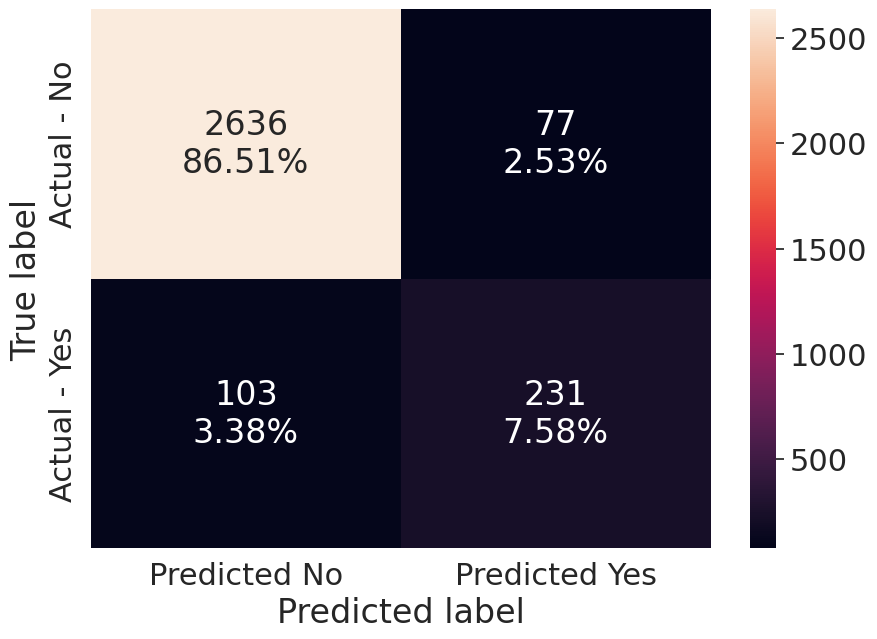

In [ ]:
make_confusion_matrix(model,y_test)

In [ ]:
get_recall_score(model)

Recall on training set:  1.0
Recall on test set:  0.6916167664670658


In [ ]:
#  we see here that the model has severly overfit. let us now see how the full grown tree looks

Vizualize the Tree

In [ ]:
feature_names = x.columns

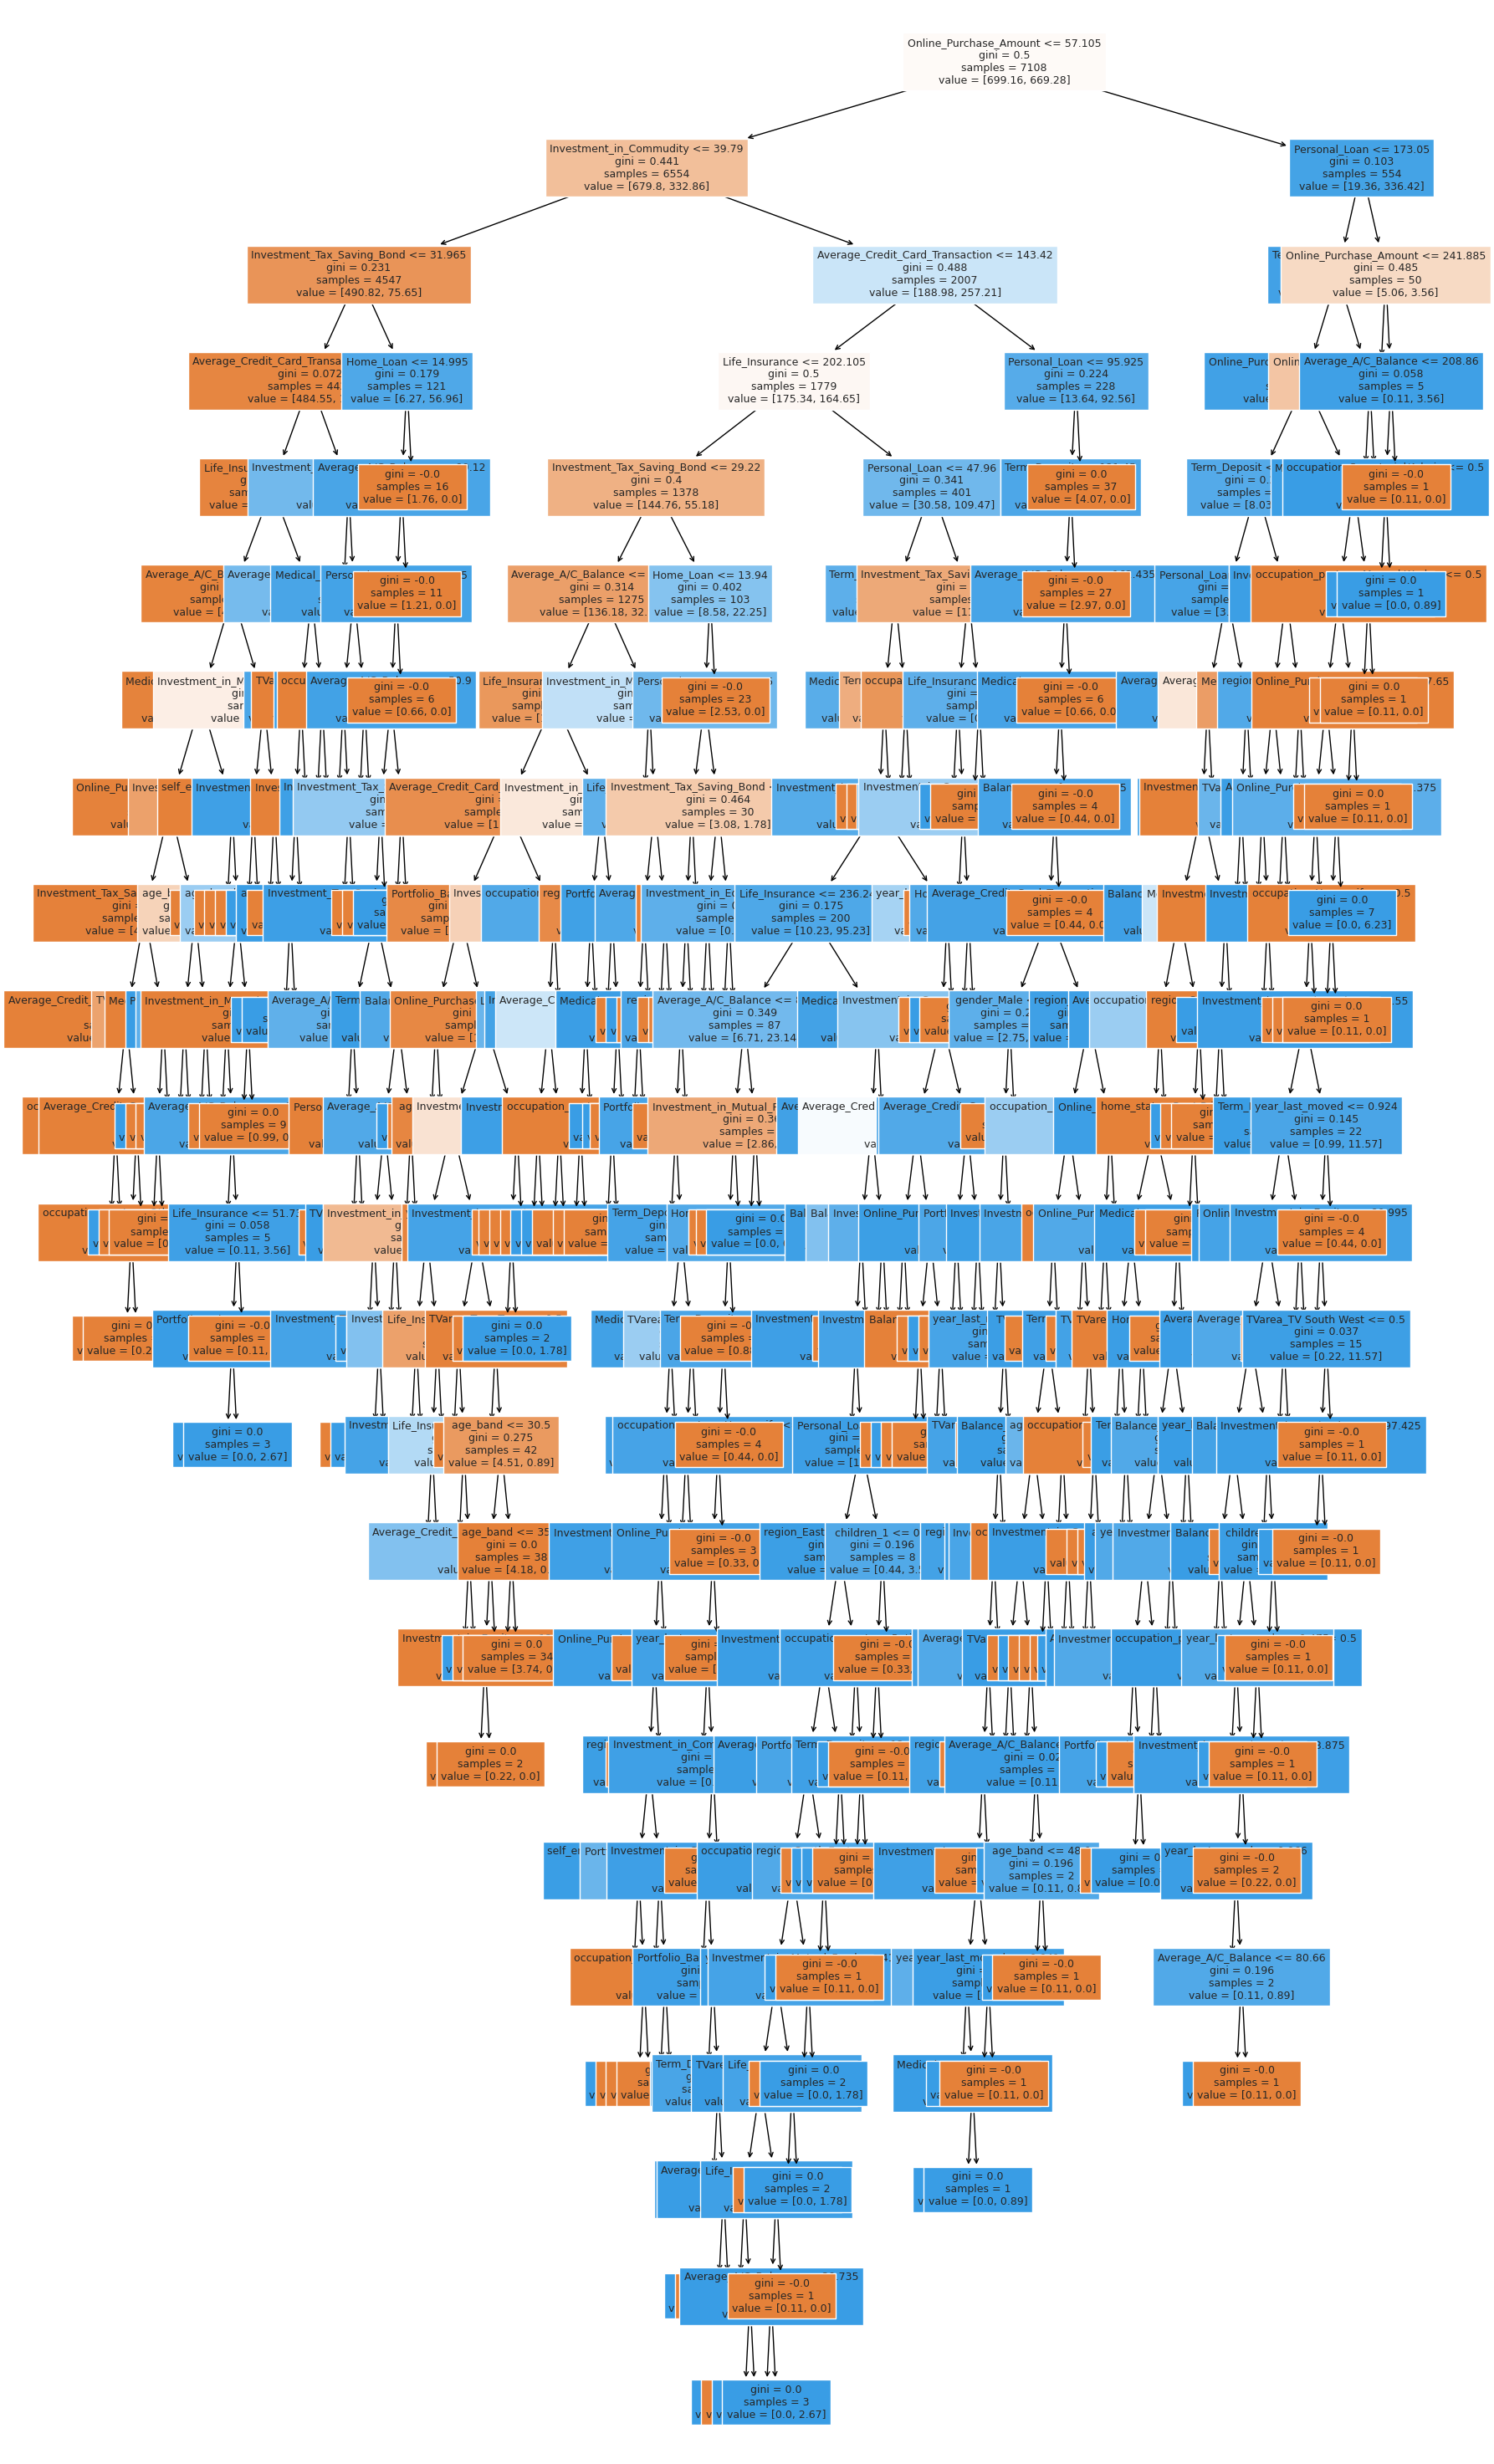

In [ ]:
plt.figure(figsize=(20,38))
out = tree.plot_tree(model,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(1)
        arrow.set_edgecolor('black')

plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0:0.11, 1:0.89})

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(1, 10),
    'criterion': ['entropy', 'gini'],
    'splitter': ['best', 'random'],
    'min_impurity_decrease': [0.000001, 0.00001, 0.0001],
    'max_features': ['log2', 'sqrt']
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.                                 I
estimator.fit(x_train, y_train)



DecisionTreeClassifier(class_weight={0: 0.11, 1: 0.89}, max_depth=9,
                       max_features='sqrt', min_impurity_decrease=0.0001,
                       random_state=1)

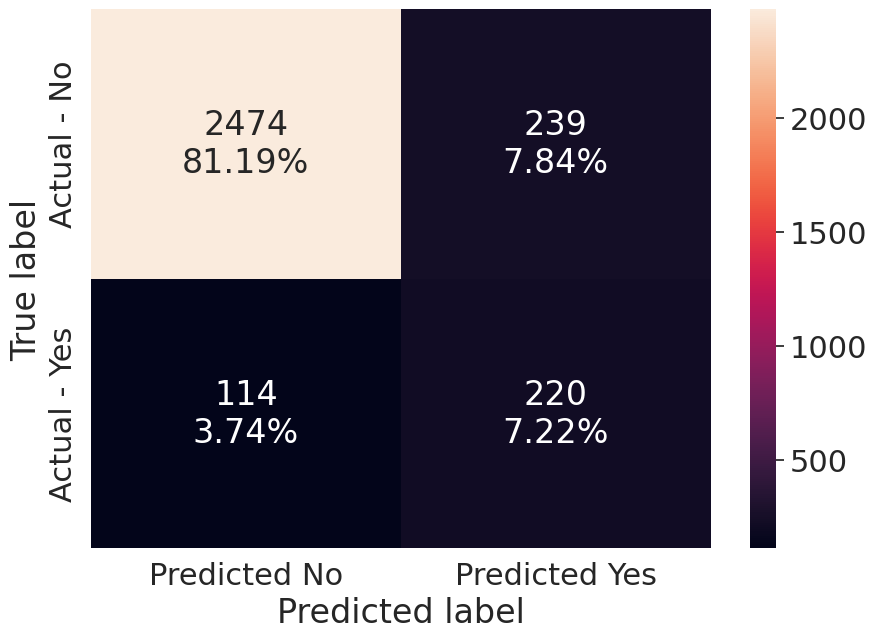

In [ ]:
make_confusion_matrix(estimator, y_test)

In [ ]:
get_recall_score(estimator)

Recall on training set:  0.8430851063829787
Recall on test set:  0.6586826347305389


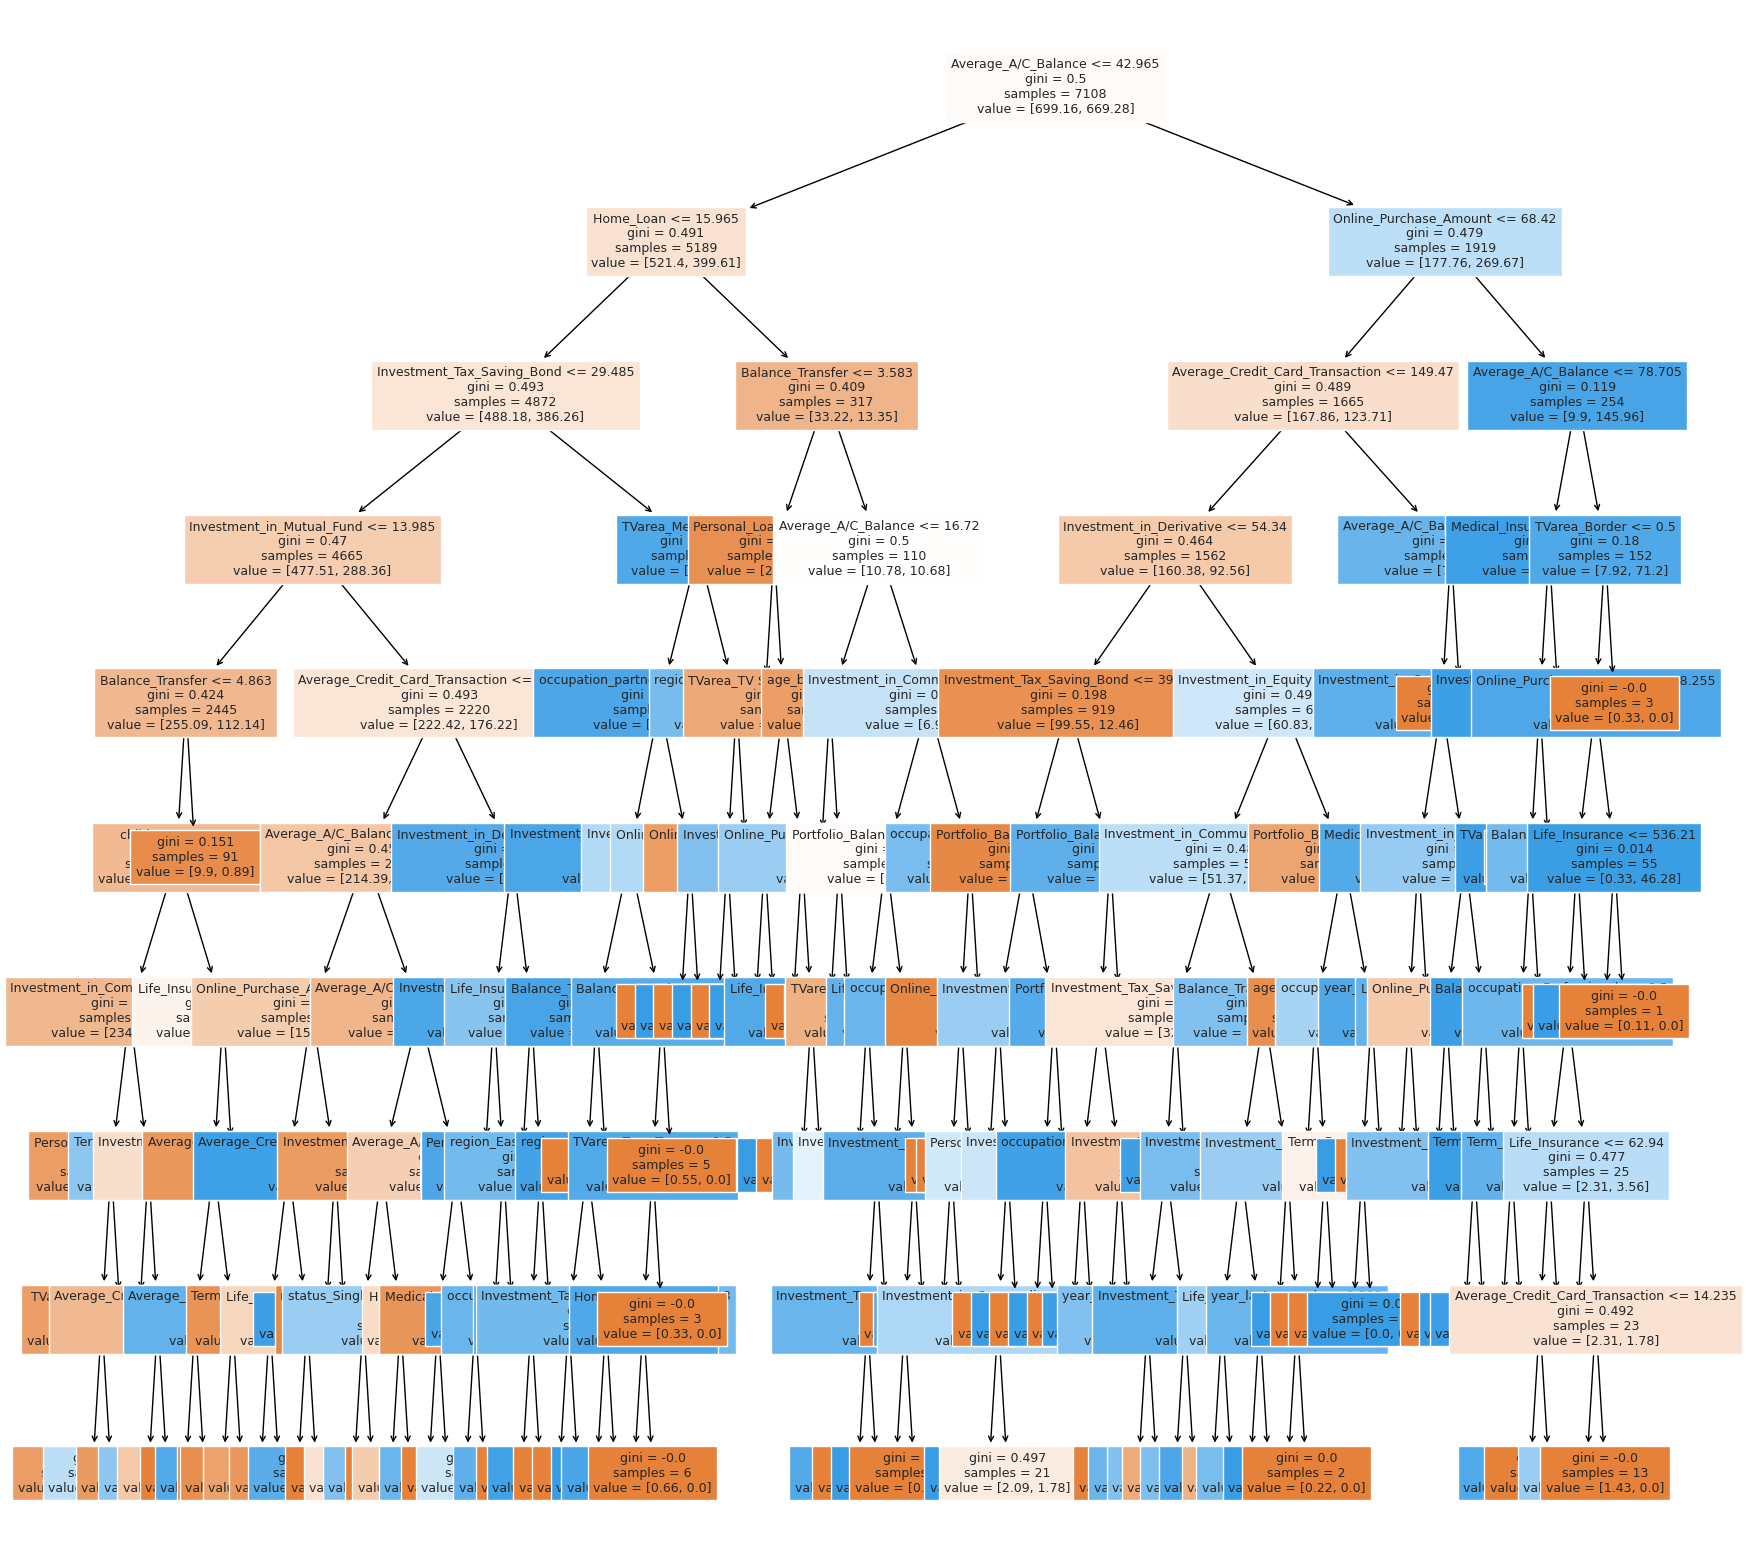

In [ ]:
plt.figure(figsize=(20,20))
out = tree.plot_tree(estimator,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(1)
        arrow.set_edgecolor('black')

plt.show()


In [ ]:
#  Now trying with Randomized SearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.11, 1: 0.89})

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(1, 10),
    'criterion': ['entropy', 'gini'],
    'splitter': ['best', 'random'],
    'min_impurity_decrease': [0.000001, 0.00001, 0.0001],
    'max_features': ['log2', 'sqrt']
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = RandomizedSearchCV(estimator, parameters, scoring=scorer, cv=5, n_iter=50)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)


DecisionTreeClassifier(class_weight={0: 0.11, 1: 0.89}, max_depth=9,
                       max_features='sqrt', min_impurity_decrease=0.0001,
                       random_state=1)

In [ ]:
get_recall_score(estimator)

Recall on training set:  0.8430851063829787
Recall on test set:  0.6586826347305389


POST - Purning

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.11, 1: 0.89})
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0         0.000      -0.000
1         0.000      -0.000
2         0.000      -0.000
3         0.000      -0.000
4         0.000      -0.000
..          ...         ...
161       0.011       0.172
162       0.024       0.221
163       0.061       0.282
164       0.072       0.353
165       0.146       0.500

[166 rows x 2 columns]

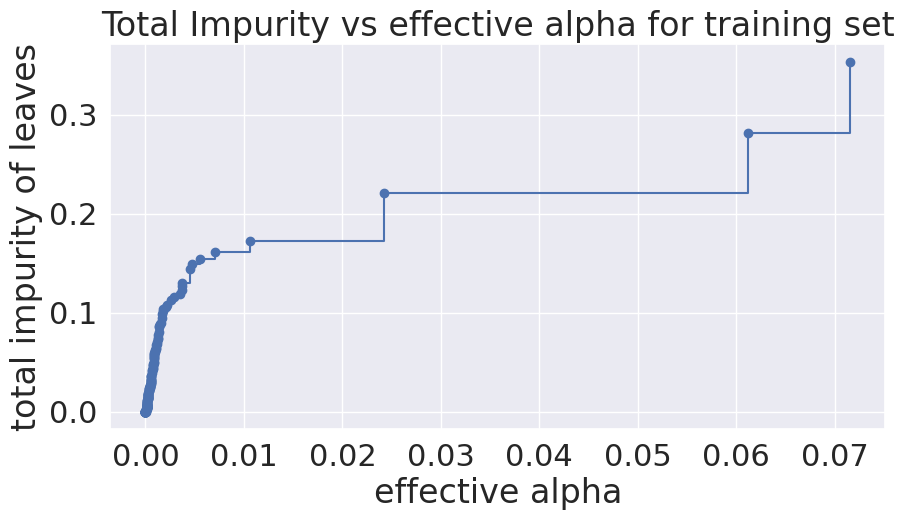

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()


In [ ]:
# the overlapping or the more dense nodes causes overfitting.

# Next we train a descison tree using the effective alphas . the last value in ccp_alpha is the alpha value that purnes the whole tree, leaving the tree, clifs[-1] , with one node

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight = {0:0.11,1:0.89})
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
    clfs[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.1464310014440352


In [ ]:
# For the remainder, we remove the last element in clfs and ccp_alpha, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.


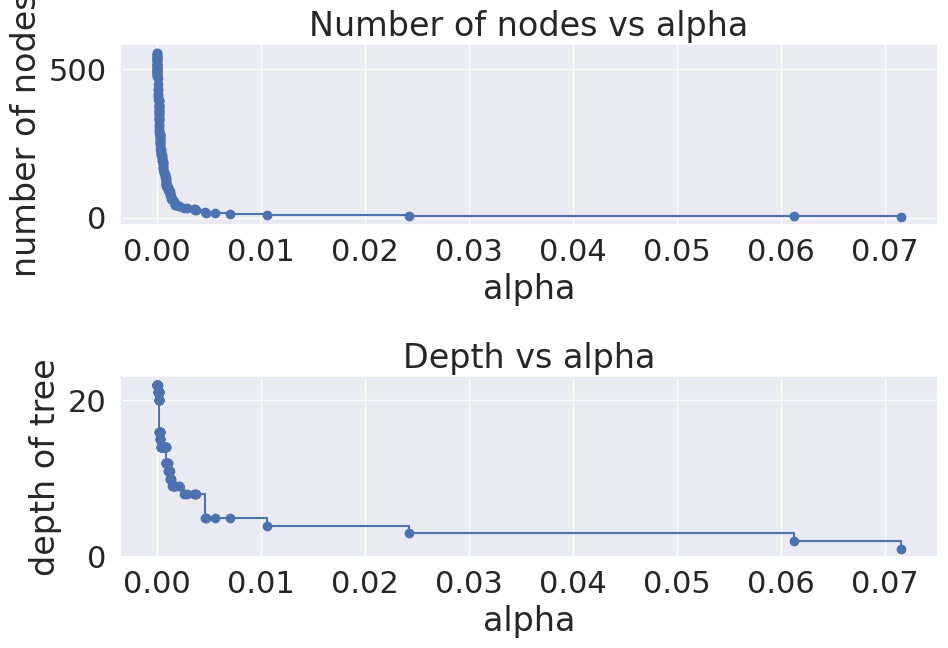

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots (2, 1, figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")

ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")

ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")

ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")

ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(x_train)
    values_train=metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)


In [ ]:
recall_test = []

for clf in clfs:
    pred_test = clf.predict(x_test)
    value_test = metrics.recall_score(y_test, pred_test)
    recall_test.append(value_test)


In [ ]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test,y_test)for clf in clfs]

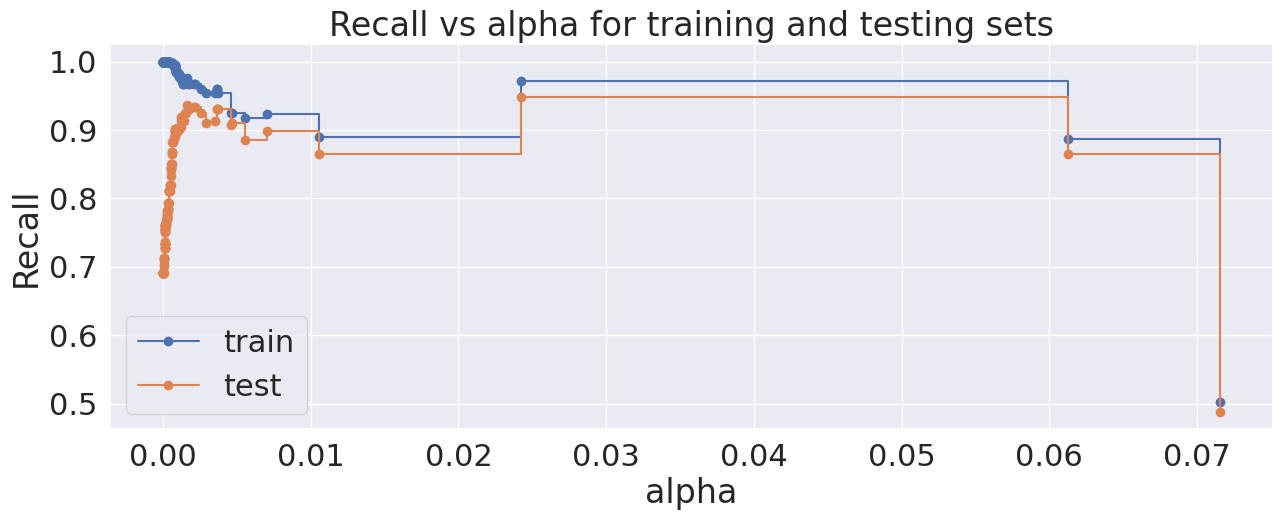

In [ ]:
fig, ax = plt.subplots (figsize=(15,5))
ax.set_xlabel("alpha")

ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
drawstyle="steps-post",)

ax.plot(ccp_alphas, recall_test, marker='o', label="test",
drawstyle="steps-post")

ax.legend()
plt.show()


In [ ]:
# Maximum value of Recall is at 0.058 alpha, but if we choose descision tree will only have a root node and we would lose the bussiness rules, instead we can choose alpha 0.008 retaining information and getting higher recall

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs [index_best_model]
print(best_model)


DecisionTreeClassifier(ccp_alpha=0.024258930434177442,
                       class_weight={0: 0.11, 1: 0.89}, random_state=1)


In [ ]:
best_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.024258930434177442,
                       class_weight={0: 0.11, 1: 0.89}, random_state=1)

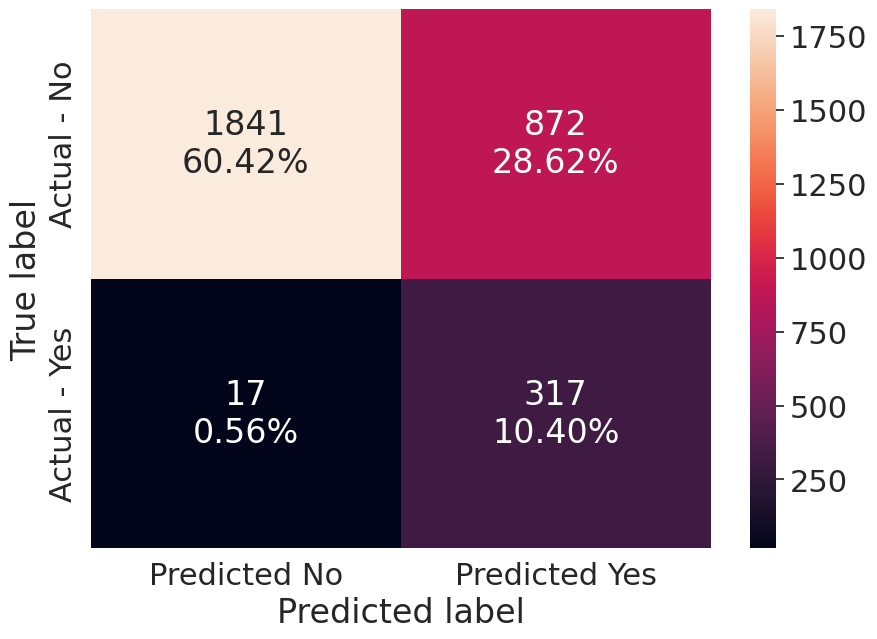

In [ ]:
make_confusion_matrix (best_model,y_test)


In [ ]:
get_recall_score(best_model)

Recall on training set:  0.9720744680851063
Recall on test set:  0.9491017964071856


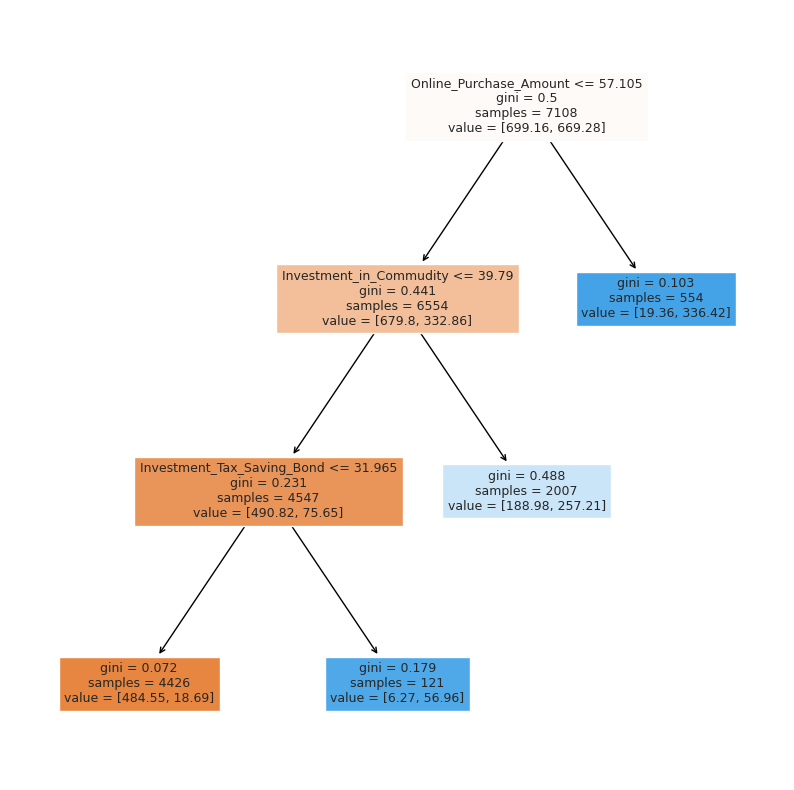

In [ ]:
plt.figure(figsize=(10,10))
out = tree.plot_tree(best_model,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(1)
        arrow.set_edgecolor('black')

plt.show()


creating model with 0.008 ccp_alpha

In [ ]:

best_model2 = DecisionTreeClassifier(ccp_alpha=0.008, class_weight={0: 0.11, 1: 0.89}, random_state=1)
best_model2.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.008, class_weight={0: 0.11, 1: 0.89},
                       random_state=1)

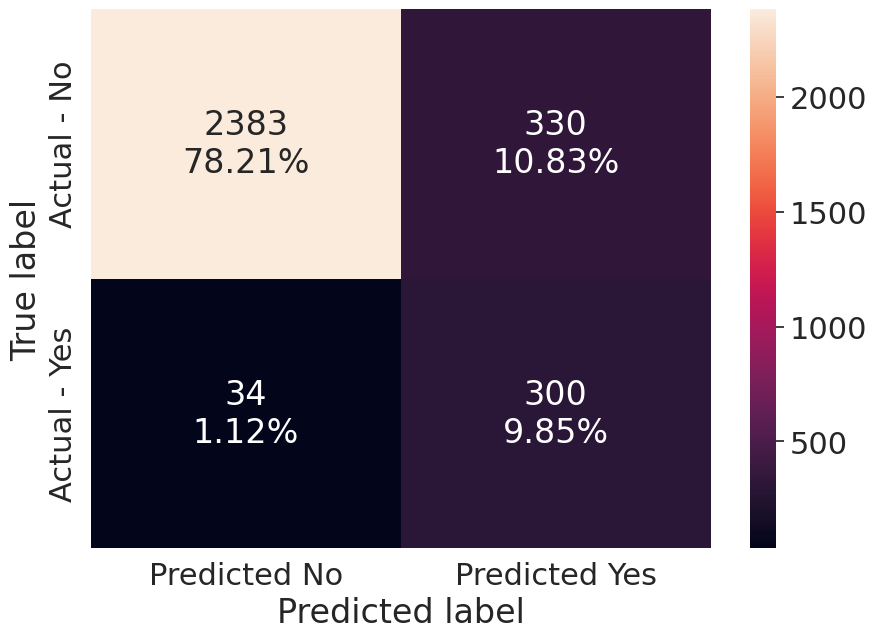

In [ ]:
make_confusion_matrix (best_model2,y_test)


In [ ]:
get_recall_score(best_model2)

Recall on training set:  0.9228723404255319
Recall on test set:  0.8982035928143712


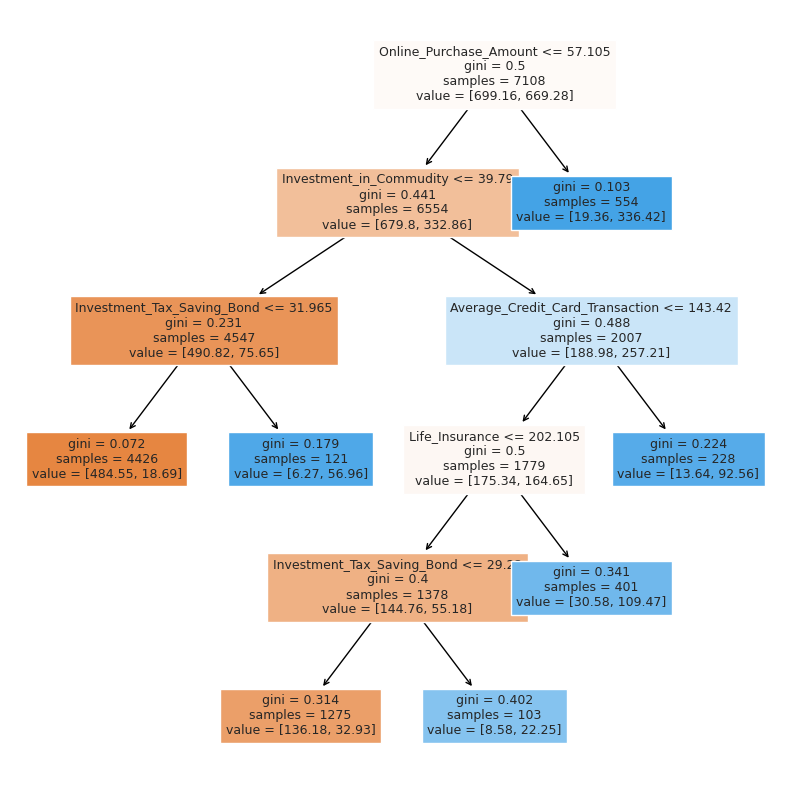

In [ ]:
plt.figure(figsize=(10,10))
out = tree.plot_tree(best_model2,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(1)
        arrow.set_edgecolor('black')

plt.show()


creating model with ccp_alpha(0.015)

In [ ]:

best_model3 = DecisionTreeClassifier(ccp_alpha=0.015, class_weight={0: 0.11, 1: 0.89}, random_state=1)
best_model3.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.015, class_weight={0: 0.11, 1: 0.89},
                       random_state=1)

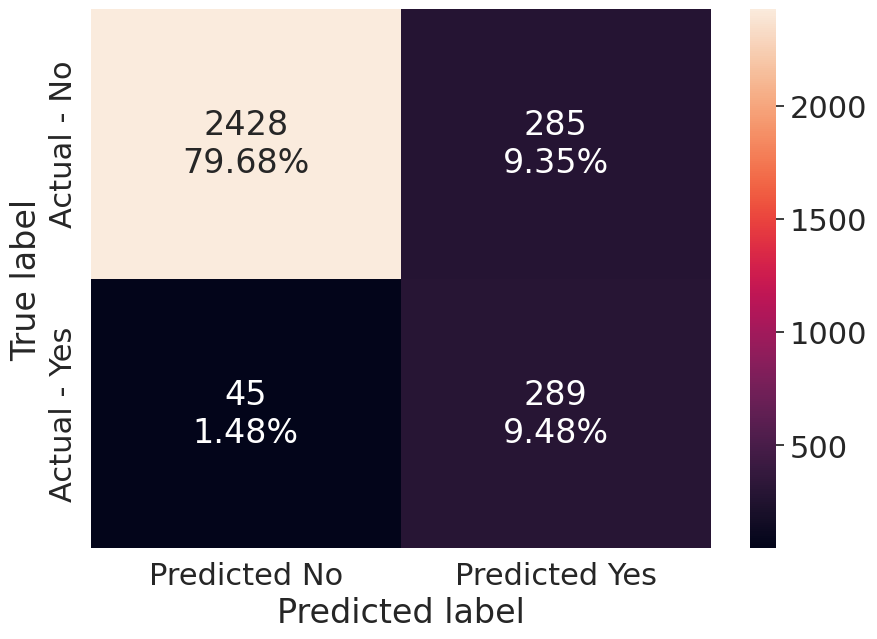

In [ ]:
make_confusion_matrix (best_model3,y_test)


In [ ]:
get_recall_score(best_model3)

Recall on training set:  0.8896276595744681
Recall on test set:  0.8652694610778443


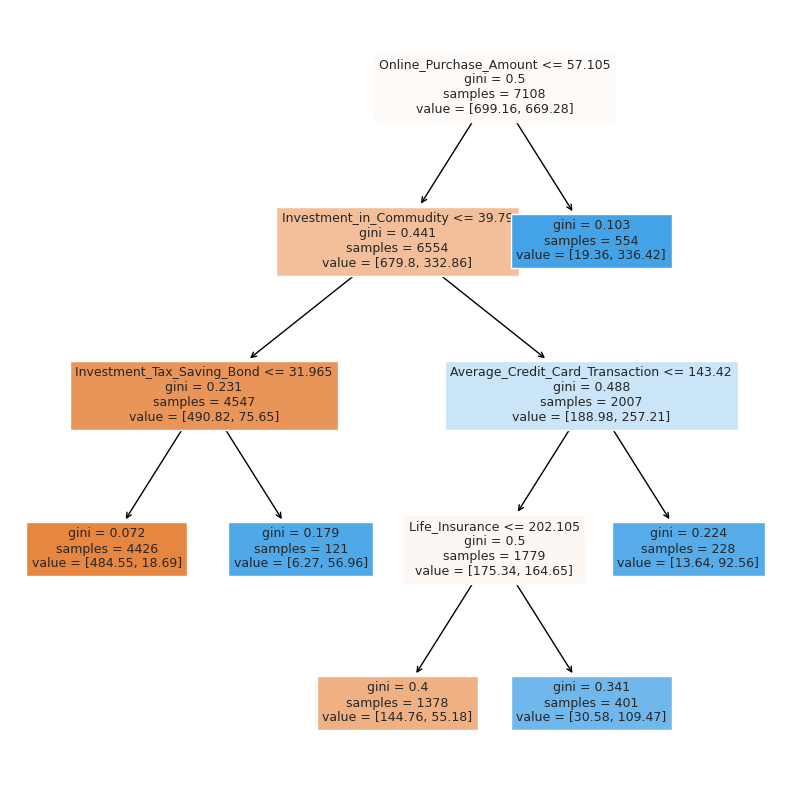

In [ ]:
plt.figure(figsize=(10,10))
out = tree.plot_tree(best_model3,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(1)
        arrow.set_edgecolor('black')

plt.show()


In [ ]:
# importance of features in the tree building (The importance of a feature is computed as the
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance.


# Assuming best_model2 is the correct model
importance_df = pd.DataFrame(best_model2.feature_importances_, columns=["Imp"], index=x_train.columns)
sorted_importance = importance_df.sort_values(by="Imp", ascending=False)

print(sorted_importance)



                                   Imp
Online_Purchase_Amount           0.433
Investment_Tax_Saving_Bond       0.212
Investment_in_Commudity          0.212
Life_Insurance                   0.091
Average_Credit_Card_Transaction  0.052
...                                ...
occupation_partner_Housewife     0.000
occupation_partner_Manual Worker 0.000
occupation_partner_Other         0.000
year_last_moved                  0.000
region_West Midlands             0.000

[67 rows x 1 columns]


comparing all models

In [ ]:
comparison_frame = pd.DataFrame({'Model': ['Initial decision tree model', 'Decision treee with (randomizied) hyperparameter tuning','Decision tree with post-pruning (ccp_alpha=0.008)' ,'Decision tree with post-pruning (ccp_alpha=0.015)'], 'Train_Recall': [100.00,88.56,92.89,88.96], 'Test_Recall': [69.40,73.95,90.00,86.52]})
comparison_frame


Model  Train_Recall  \
0                        Initial decision tree model       100.000   
1  Decision treee with (randomizied) hyperparamet...        88.560   
2  Decision tree with post-pruning (ccp_alpha=0.008)        92.890   
3  Decision tree with post-pruning (ccp_alpha=0.015)        88.960   

   Test_Recall  
0       69.400  
1       73.950  
2       90.000  
3       86.520

In [ ]:
# we see that  Decision treee with (randomizied) hyperparametreing tuning and intial model is good, but Decision tree with post-pruning (ccp_alpha=0.008) is giving me better results.


Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(x_train,y_train)

BaggingClassifier(random_state=1)

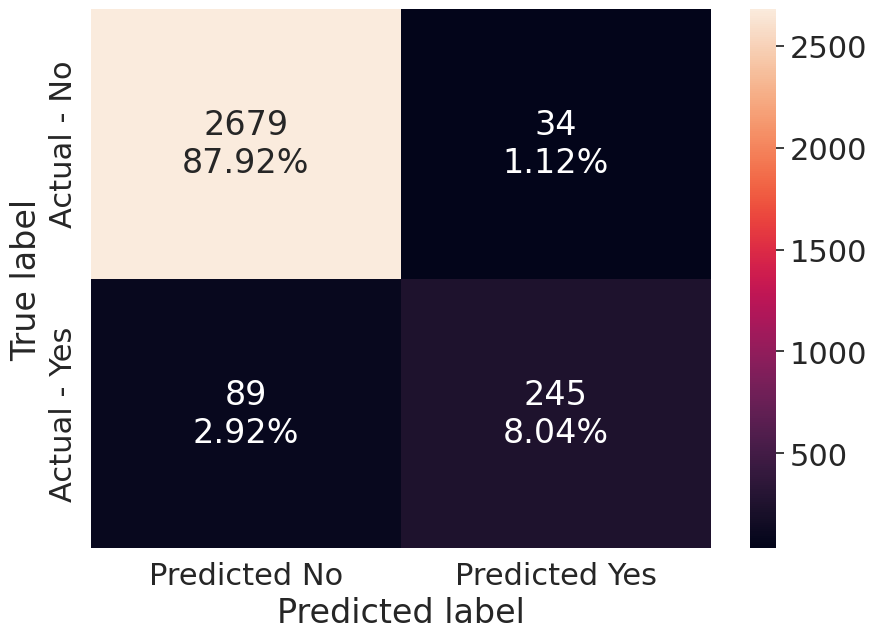

In [ ]:
make_confusion_matrix(bagging,y_test)

In [ ]:
get_recall_score(bagging)

Recall on training set:  0.9867021276595744
Recall on test set:  0.7335329341317365


Bagging Classifier with weighted Decision Tree

In [ ]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.11,1:0.89},random_state=1),random_state=1)
bagging_wt.fit(x_train,y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.11,
                                                                      1: 0.89},
                                                        random_state=1),
                  random_state=1)

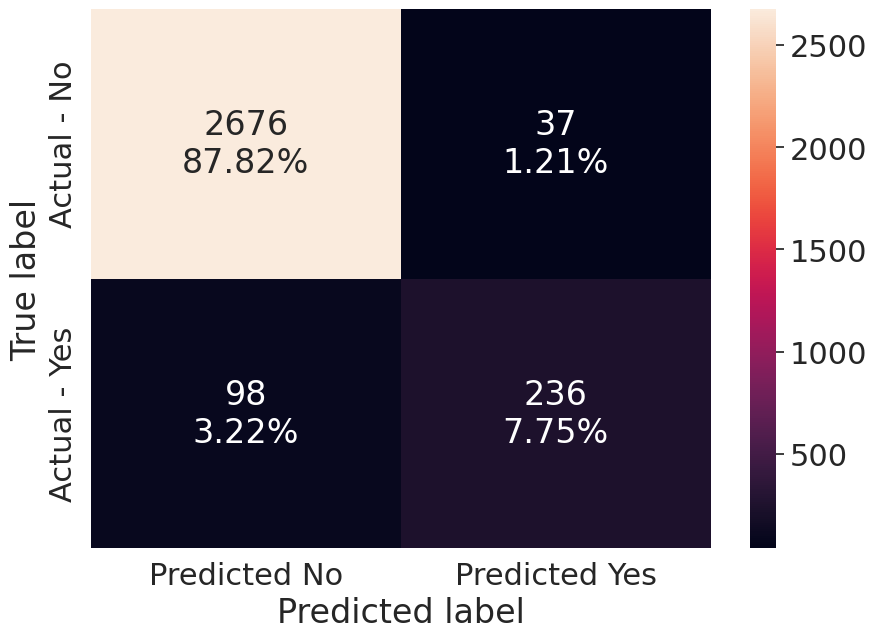

In [ ]:
make_confusion_matrix(bagging_wt,y_test)

In [ ]:
get_recall_score(bagging_wt)

Recall on training set:  0.9707446808510638
Recall on test set:  0.7065868263473054


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

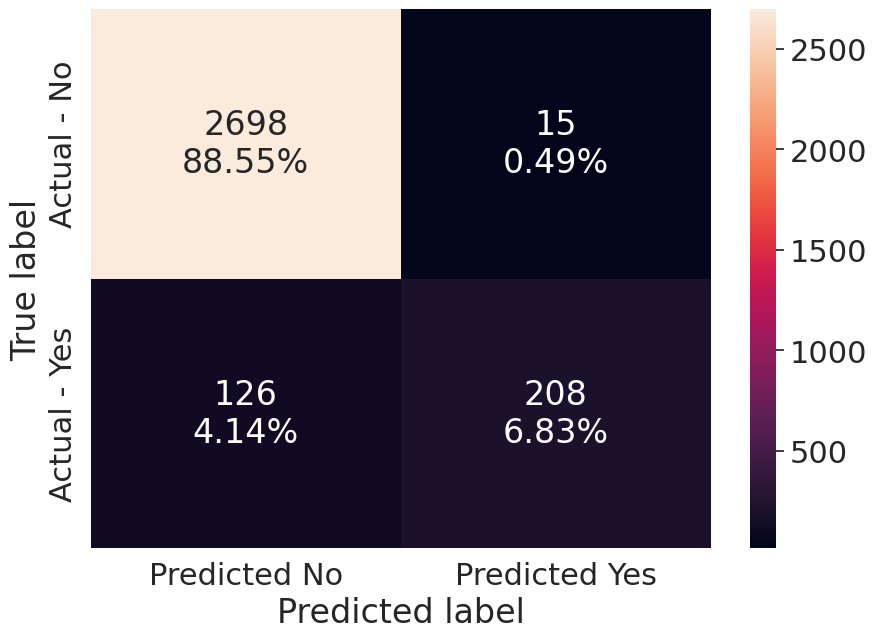

In [ ]:
make_confusion_matrix(rf,y_test)

In [ ]:
get_recall_score(rf)

Recall on training set:  1.0
Recall on test set:  0.6227544910179641


Random Forest with class weight

In [ ]:
rf_wt = RandomForestClassifier(class_weight={0:0.11,1:0.89},random_state=1)
rf_wt.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 0.11, 1: 0.89}, random_state=1)

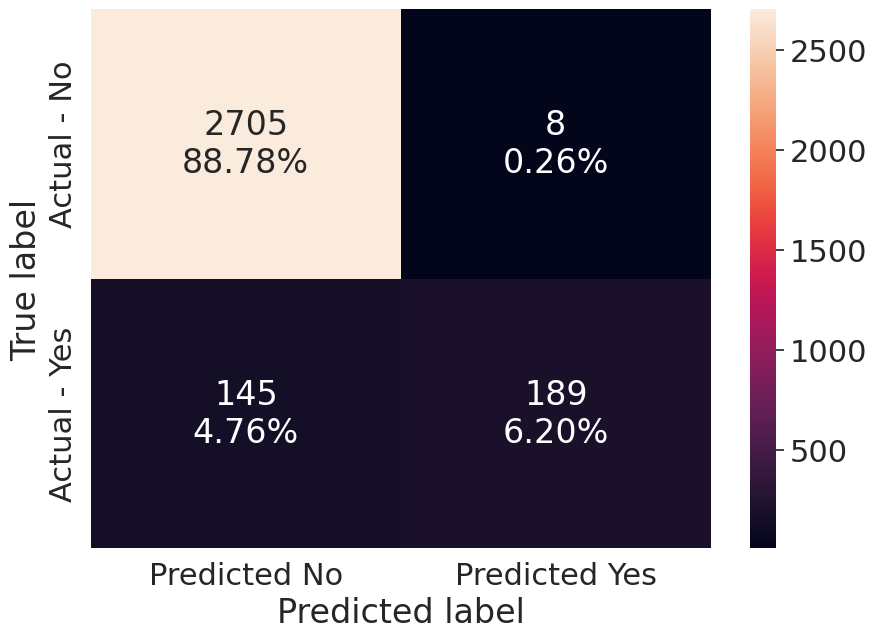

In [ ]:
make_confusion_matrix(rf_wt,y_test)

In [ ]:
get_recall_score(rf_wt)

Recall on training set:  1.0
Recall on test set:  0.5658682634730539


HYPER PARAMETER TUNING

TUNING Bagging Classifier

In [ ]:
# Create a base classifier (Decision Tree with class weights)
cl1 = DecisionTreeClassifier(class_weight={0: 0.11, 1: 0.89}, random_state=1)

# Define the parameter grid for GridSearchCV
param_grid = {
    'base_estimator': [cl1],
    'n_estimators': [5, 7, 15, 51, 101],
    'max_features': [0.7, 0.8, 0.9, 1]
}

# Create the BaggingClassifier with default parameters (you can customize them if needed)
bagging_classifier = BaggingClassifier(random_state=1, bootstrap=True)

# Create the GridSearchCV object
grid = GridSearchCV(bagging_classifier, param_grid=param_grid, scoring='recall', cv=5)  # specify the number of folds for cross-validation

# Fit the GridSearchCV on the training data
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.11,
                                                                                 1: 0.89},
                                                                   random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='recall')

In [ ]:
get_recall_score(grid)

Recall on training set:  0.9973404255319149
Recall on test set:  0.7035928143712575


Random Forest Tunning

In [ ]:
# Choose the type of classifier.
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [110, 251, 501],
    "min_samples_leaf": np.arange(1, 6, 1),
    "max_features": [0.7, 0.9, 'log2', 'sqrt'],
    "max_samples": [0.7, 0.9, None],  # none=100%
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall', cv=5)
grid_obj = grid_obj.fit(x_train, y_train)


In [ ]:
get_recall_score(grid_obj)

Recall on training set:  1.0
Recall on test set:  0.7604790419161677


BOOSTING MODEL

AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ab_regressor=AdaBoostClassifier(random_state=1)
ab_regressor.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
ab_regressor_score=get_recall_score(ab_regressor)

Recall on training set:  0.6768617021276596
Recall on test set:  0.6317365269461078


GRADIENT BOOSTING CLASSIFIER

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_estimator=GradientBoostingClassifier(random_state=1)
gb_estimator.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
gb_estimator_score=get_recall_score(gb_estimator)

Recall on training set:  0.8577127659574468
Recall on test set:  0.7395209580838323


Hyperparameter tunning with Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Choose the type of regressor.
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10, 100, 10),
              'learning_rate': [1, 0.1, 0.5, 0.01]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the randomized grid search
randomized_search_obj = RandomizedSearchCV(ab_tuned, parameters, scoring=scorer, cv=5, n_iter=10, random_state=42)
randomized_search_obj = randomized_search_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned_randomized = randomized_search_obj.best_estimator_


In [ ]:
get_recall_score(ab_tuned_randomized)

Recall on training set:  0.7127659574468085
Recall on test set:  0.6317365269461078


In [ ]:
# Choose the type of classifier.
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50, 100, 150),
              'learning_rate': [0.01, 0.1, 0.5, 1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the randomized grid search
randomized_search_obj = RandomizedSearchCV(ab_tuned, parameters, scoring=scorer, cv=5, n_iter=50, random_state=1)
randomized_search_obj = randomized_search_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned_randomized = randomized_search_obj.best_estimator_

In [ ]:
get_recall_score(ab_tuned_randomized)

Recall on training set:  0.6768617021276596
Recall on test set:  0.6317365269461078


HyperParameter with Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50, 200, 25),
              'subsample': [0.7, 0.8, 0.9, 1],
              'max_features': [0.7, 0.8, 0.9, 1],
              'max_depth': [3, 5, 7, 10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the randomized grid search
randomized_search_obj = RandomizedSearchCV(gb_tuned, parameters, scoring=scorer, cv=5, n_iter=10, random_state=42)
randomized_search_obj = randomized_search_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned_randomized = randomized_search_obj.best_estimator_


In [ ]:
get_recall_score(gb_tuned_randomized)

Recall on training set:  0.9986702127659575
Recall on test set:  0.7574850299401198


In [ ]:
gb_tuned = GradientBoostingClassifier(random_state=1)

# Define a more focused grid of parameters to choose from
focused_parameters = {
    'n_estimators': np.arange(150, 300, 25),
    'subsample': [0.9, 1.0],
    'max_features': [0.8, 0.9, 1.0],
    'max_depth': [5, 7, 10, 15]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the randomized grid search with the focused parameters
randomized_search_obj = RandomizedSearchCV(gb_tuned, focused_parameters, scoring=scorer, cv=5, n_iter=10, random_state=42)
randomized_search_obj = randomized_search_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned_randomized = randomized_search_obj.best_estimator_

In [ ]:
get_recall_score(gb_tuned_randomized)

Recall on training set:  1.0
Recall on test set:  0.7784431137724551


XG BOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_estimator=XGBClassifier(random_state=42)
xgb_estimator.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
get_recall_score(xgb_estimator)

Recall on training set:  1.0
Recall on test set:  0.7964071856287425


Hyper Parameter Tunning with XGBOOST

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'n_estimators': [100, 150, 200],
    'subsample': [0.8, 0.9, 1.0],
    'gamma': [0.1, 0.5, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'colsample_bylevel': [0.8, 0.9, 1.0],
    'colsample_by_node': [0.8, 0.9, 1.0],
    'learning_rate': [0.01, 0.05, 0.1],  # Adjusted learning_rate
    'scale_pos_weight': [1, 5, 10]  # Added scale_pos_weight
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the randomized grid search
randomized_search_obj = RandomizedSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5, n_iter=10, random_state=42)
randomized_search_obj = randomized_search_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned_randomized = randomized_search_obj.best_estimator_

In [ ]:
get_recall_score(xgb_tuned_randomized)

Recall on training set:  0.9547872340425532
Recall on test set:  0.9341317365269461


In [ ]:
import xgboost as xgb
from sklearn.metrics import recall_score

# Assuming you already have your data and labels
data = x  # Your input data
labels = y  # Your corresponding labels

# Create an instance of XGBClassifier
clf = xgb.XGBClassifier()

# Fit the classifier on the whole dataset
clf.fit(data, labels)

# Now you can use the trained classifier for predictions
predictions = clf.predict(data)

# Calculate recall score
recall = recall_score(labels, predictions)

print("Recall Score:", recall)


Recall Score: 1.0


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

# Assuming X is your entire feature matrix and y is your target variable

# Define the XGBoost model
xgb_tuned = XGBClassifier()

# Grid of parameters to choose from
parameters = {
    'n_estimators': [100, 150, 200],
    'subsample': [0.8, 0.9, 1.0],
    'gamma': [0.1, 0.5, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'colsample_bylevel': [0.8, 0.9, 1.0],
    'colsample_by_node': [0.8, 0.9, 1.0],
    'learning_rate': [0.01, 0.05, 0.1],
    'scale_pos_weight': [1, 5, 10],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the randomized grid search
randomized_search_obj = RandomizedSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5, n_iter=10, random_state=42)
randomized_search_obj = randomized_search_obj.fit(x, y)

# Get the best XGBoost model from the search
xgb_tuned_randomized = randomized_search_obj.best_estimator_

# Now you can use xgb_tuned_randomized for predictions or other tasks


In [ ]:
# Print the best parameters and their corresponding score+
print("Best Parameters:", randomized_search_obj.best_params_)
print("Best Recall Score:", randomized_search_obj.best_score_)

# Now you can use xgb_tuned_randomized for predictions or other tasks

Best Parameters: {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.9, 'colsample_by_node': 0.8}
Best Recall Score: 0.9355515156639749


CONCLUSION:

The best recall score achieved with these parameters is approximately 0.936. This means that the model is able to correctly identify around 93.6% of the positive cases (customers likely to accept a discount offering).